# Telco Churn Analysis
We will opt for standard approach with following steps :-

Step 1: Importing - Importing data and Standard Libraries

Step 2: Data Cleaning and Vissualization - Looking data for missing values, remove unrequired data, managing data-types and Visualizing data with graphs and Charts and looking for outliers

Dataset Info: Sample Data Set containing Telco customer data and showing customers left last month

In [16]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve

## Exploratory Data Analysis

Importing Dataset

In [17]:
df = pd.read_csv(r'C:\Users\admin\Desktop\Interview\Copy of Telco_customer_churn.csv')
df.head()

,CustomerID,Country,State,City,Zip Code,Latitude,Longitude,gender,SeniorCitizen,Partner,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Value,ChurnScore,CLTV,ChurnReason
0,9237,India,Hyderabad,Nacharam,502334,34.059281,-118.307420,Female,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
1,9305,India,Hyderabad,Nacharam,502334,34.048013,-118.293953,Female,No,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
2,7892,India,Hyderabad,Nacharam,502334,34.062125,-118.315709,Female,No,Yes,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
3,280,India,Hyderabad,Nacharam,502334,34.039224,-118.266293,Male,No,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices
4,4190,India,Hyderabad,Nacharam,90020,34.066367,-118.309868,Female,No,Yes,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [18]:
df.shape

(2139, 31)

In [19]:
df.to_csv('main dataset.csv')

In [4]:
# data overview
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : \n', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  7043
Columns  :  31

Features : 
 ['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure Months', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn Value', 'ChurnScore', 'CLTV', 'ChurnReason']

Missing values :   5174

Unique values :  
 CustomerID          5084
Country                2
State                  2
City                1130
Zip Code            1655
Latitude            1652
Longitude           1651
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure Months         73
PhoneService           2
MultipleLines          3
InternetService        4
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport

In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   int64  
 1   Country           7043 non-null   object 
 2   State             7043 non-null   object 
 3   City              7043 non-null   object 
 4   Zip Code          7043 non-null   int64  
 5   Latitude          7043 non-null   float64
 6   Longitude         7043 non-null   float64
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   object 
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  Tenure Months     7043 non-null   int64  
 12  PhoneService      7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


CustomerID             0
Country                0
State                  0
City                   0
Zip Code               0
Latitude               0
Longitude              0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
Tenure Months          0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
Churn Value            0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

In [6]:
df = df.dropna(how='all') # remove samples with null fields
df = df[~df.duplicated()] # remove duplicates
df[df.TotalCharges == ' '] # display all 11 rows with spaces in TotalCharges column (0.15% missing data)

,CustomerID,Country,State,City,Zip Code,Latitude,Longitude,gender,SeniorCitizen,Partner,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Value,ChurnScore,CLTV,ChurnReason
2234,4472,United States,California,San Bernardino,92408,34.084909,-117.258107,Female,No,Yes,...,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578,NaN
2438,3115,United States,California,Independence,93526,36.869584,-118.189241,Male,No,No,...,Two year,No,Mailed check,20.25,,No,0,68,5504,NaN
2568,5709,United States,California,San Mateo,94401,37.590421,-122.306467,Female,No,Yes,...,Two year,No,Mailed check,80.85,,No,0,45,2048,NaN
2667,4367,United States,California,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,...,Two year,No,Mailed check,25.75,,No,0,48,4950,NaN
2856,1371,United States,California,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,...,Two year,No,Credit card (automatic),56.05,,No,0,30,4740,NaN
4331,7644,United States,California,Los Angeles,90029,34.089953,-118.294824,Male,No,Yes,...,Two year,No,Mailed check,19.85,,No,0,53,2019,NaN
4687,3213,United States,California,Sun City,92585,33.739412,-117.173334,Male,No,Yes,...,Two year,No,Mailed check,25.35,,No,0,49,2299,NaN
5104,2520,United States,California,Ben Lomond,95005,37.078873,-122.090386,Female,No,Yes,...,Two year,No,Mailed check,20.00,,No,0,27,3763,NaN
5719,2923,United States,California,La Verne,91750,34.144703,-117.770299,Male,No,Yes,...,One year,Yes,Mailed check,19.70,,No,0,69,4890,NaN
6772,4075,United States,California,Bell,90201,33.970343,-118.171368,Female,No,Yes,...,Two year,No,Mailed check,73.35,,No,0,44,2342,NaN


In [7]:
# # remove 11 rows with spaces in TotalCharges column (0.15% missing data)
# total_charges_filter = df.TotalCharges == ' '
# df = df[~total_charges_filter]  # remove rows with space in TotalCharges cell
# df.TotalCharges = pd.to_numeric(df.TotalCharges)  # convert TotalCharges column from object to float type

# remove 11 rows with spaces in TotalCharges column (0.15% missing data)
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)   # replace space with null field
#df = df.dropna(how = 'any')   # remove all rows with any null fields 
nan_value = float("NaN")
df['TotalCharges'] = df['TotalCharges'].astype(float)  # convert TotalCharges column from object to float type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   int64  
 1   Country           7043 non-null   object 
 2   State             7043 non-null   object 
 3   City              7043 non-null   object 
 4   Zip Code          7043 non-null   int64  
 5   Latitude          7043 non-null   float64
 6   Longitude         7043 non-null   float64
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   object 
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  Tenure Months     7043 non-null   int64  
 12  PhoneService      7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [8]:
df["Churn"].unique()

array(['Yes', 'No'], dtype=object)

No     5174
Yes    1869
Name: Churn, dtype: int64


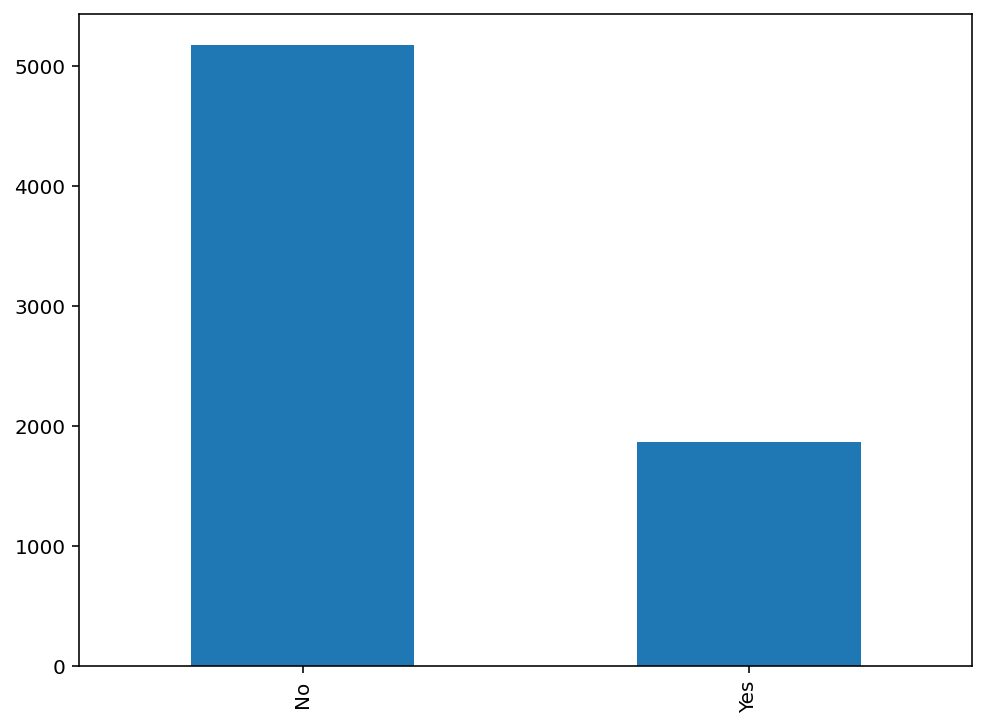

In [9]:
# Target variable distribution is not balanced as there are more non-churned than churned users
print(df.Churn.value_counts())
#df['Churn'].value_counts().plot('bar').set_title('Churn')
df['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))


In [10]:
# percentage of churn customers
1869/(5163+1869)

0.26578498293515357

In [11]:
# see all numerical columns
df.describe()

,CustomerID,Zip Code,Latitude,Longitude,Tenure Months,MonthlyCharges,TotalCharges,Churn Value,ChurnScore,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,4997.269345,152134.464575,36.282441,-119.798880,32.371149,64.761692,2283.300441,0.265370,58.699418,4400.295755
std,2855.656466,143793.592832,2.455723,2.157889,24.559481,30.090047,2266.771362,0.441561,21.525131,1183.057152
min,2.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,2575.500000,92250.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,0.000000,40.000000,3469.000000
50%,4992.000000,94118.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,7451.000000,95735.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,1.000000,75.000000,5380.500000
max,9995.000000,508374.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month



In [12]:
# replace values for SeniorCitizen as a categorical feature
df['SeniorCitizen'] = df['SeniorCitizen'].replace({1:'Yes',0:'No'})

num_cols = ['Tenure Months', 'MonthlyCharges', 'TotalCharges']
df[num_cols].describe()

,Tenure Months,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


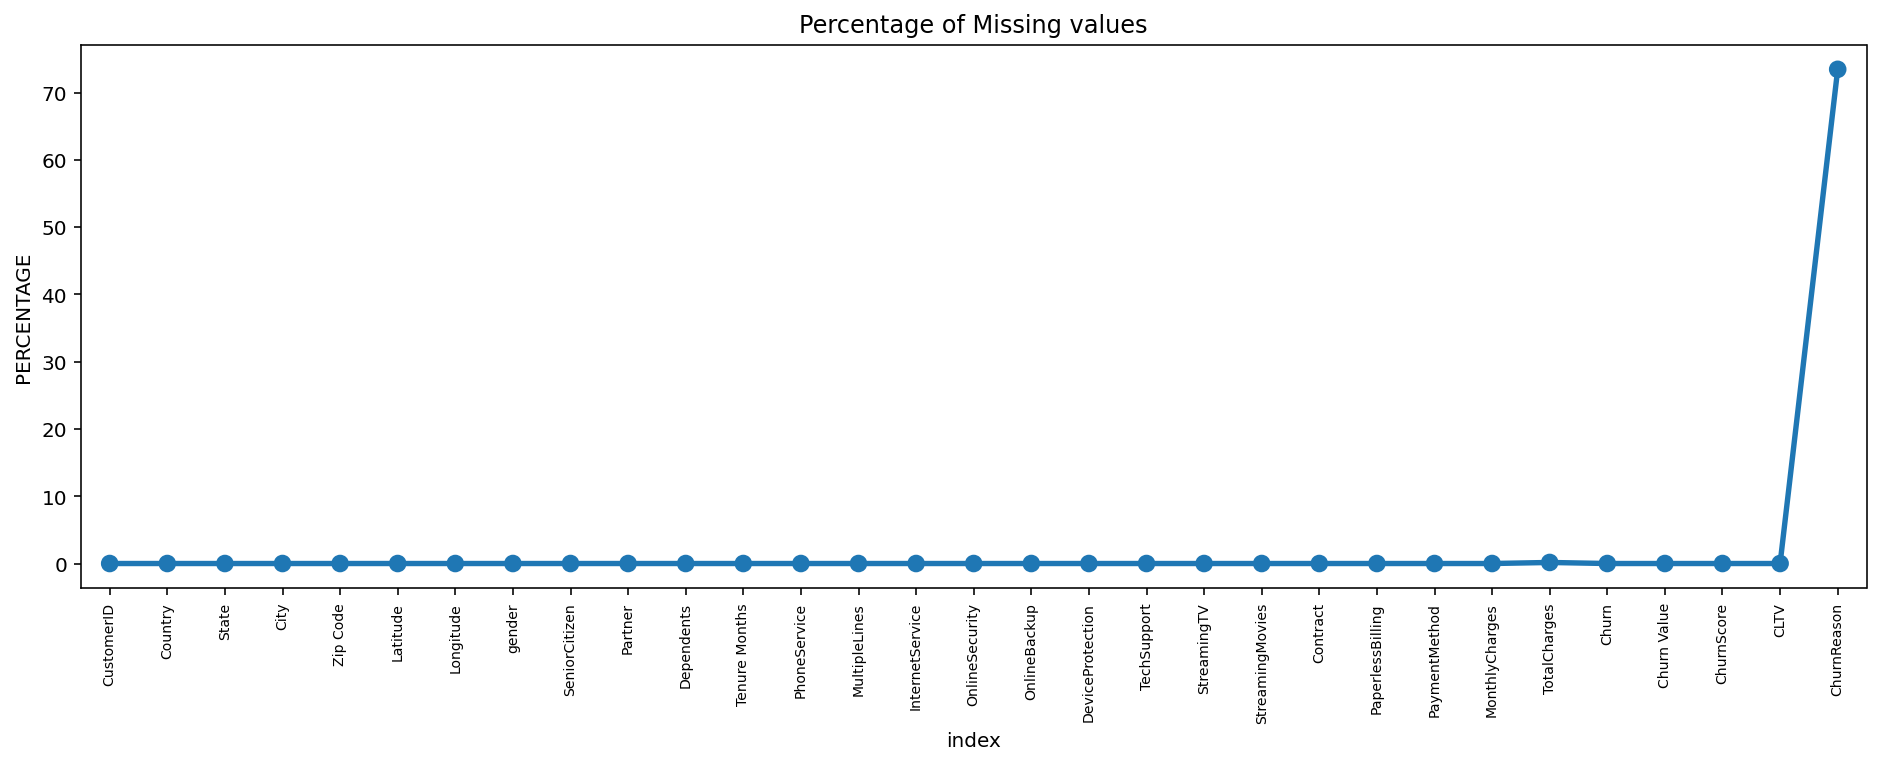

In [13]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [14]:
df = df.drop(columns = ['CustomerID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Value', 'ChurnScore', 'CLTV', 'ChurnReason'])

# Missing Data - Initial Intuition
Here, we don't have any missing data.
General Thumb Rules:

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

# Group Based Analysis

In [15]:
print('Male who Churned and Not Churned')
print(df.groupby(['gender']).get_group('Male').Churn.value_counts())
print('\n')
print('Female who Churned and Not Churned')
print(df.groupby(['gender']).get_group('Female').Churn.value_counts())

# Conclusion : Female churn slightly more than Male

Male who Churned and Not Churned
No     2625
Yes     930
Name: Churn, dtype: int64


Female who Churned and Not Churned
No     2549
Yes     939
Name: Churn, dtype: int64


In [16]:
print('Partner who Churned and Not Churned')
print(df.groupby(['Partner']).get_group('Yes').Churn.value_counts())
print('\n')
print('Non-Partner who Churned and Not Churned')
print(df.groupby(['Partner']).get_group('No').Churn.value_counts())

# Conclusion : Non-Partner Customers churn slightly more than Partenered CustomersDependent 

Partner who Churned and Not Churned
No     2733
Yes     669
Name: Churn, dtype: int64


Non-Partner who Churned and Not Churned
No     2441
Yes    1200
Name: Churn, dtype: int64


In [17]:
print('Dependents who Churned and Not Churned')
print(df.groupby(['Dependents']).get_group('Yes').Churn.value_counts())
print('\n')
print('Non-Dependents who Churned and Not Churned')
print(df.groupby(['Dependents']).get_group('No').Churn.value_counts())

# Conclusion : Non-Dependent Customers churn more than Dependent Customers

Dependents who Churned and Not Churned
No     1521
Yes     106
Name: Churn, dtype: int64


Non-Dependents who Churned and Not Churned
No     3653
Yes    1763
Name: Churn, dtype: int64


In [18]:
print('Customer with PhoneService who Churned and Not Churned')
print(df.groupby(['PhoneService']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No PhoneService who Churned and Not Churned')
print(df.groupby(['PhoneService']).get_group('No').Churn.value_counts())

# Conclusion : Almost similar ratio !

Customer with PhoneService who Churned and Not Churned
No     4662
Yes    1699
Name: Churn, dtype: int64


Customer with No PhoneService who Churned and Not Churned
No     512
Yes    170
Name: Churn, dtype: int64


In [19]:
print('Customer with MultipleLines who Churned and Not Churned')
print(df.groupby(['MultipleLines']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No MultipleLines who Churned and Not Churned')
print(df.groupby(['MultipleLines']).get_group('No').Churn.value_counts())
print('\n')
print('Customer with No PhoneService who Churned and Not Churned')
print(df.groupby(['MultipleLines']).get_group('No phone service').Churn.value_counts())

# Conclusion : Almost similar ratio !

Customer with MultipleLines who Churned and Not Churned
No     2121
Yes     850
Name: Churn, dtype: int64


Customer with No MultipleLines who Churned and Not Churned
No     2541
Yes     849
Name: Churn, dtype: int64


Customer with No PhoneService who Churned and Not Churned
No     512
Yes    170
Name: Churn, dtype: int64


In [20]:
print('Customer with DSL InternetService who Churned and Not Churned')
print(df.groupby(['InternetService']).get_group('DSL').Churn.value_counts())
print('\n')
print('Customer with Fiber optic InternetService who Churned and Not Churned')
print(df.groupby(['InternetService']).get_group('Fiber optic').Churn.value_counts())
print('\n')
print('Customer with No InternetService who Churned and Not Churned')
print(df.groupby(['InternetService']).get_group('No').Churn.value_counts())

# Conclusion : This shows customers with Fiber optic InternetService churn highest as 
# compared to DSL and no InternetService customers !!

Customer with DSL InternetService who Churned and Not Churned
No     1962
Yes     459
Name: Churn, dtype: int64


Customer with Fiber optic InternetService who Churned and Not Churned
No     1005
Yes     292
Name: Churn, dtype: int64


Customer with No InternetService who Churned and Not Churned
No     1872
Yes     113
Name: Churn, dtype: int64


In [21]:
print('Customer with StreamingMovies Service who Churned and Not Churned')
print(df.groupby(['StreamingMovies']).get_group('Yes').Churn.value_counts())
print('\n')
print('Customer with No StreamingMovies who Churned and Not Churned')
print(df.groupby(['StreamingMovies']).get_group('No').Churn.value_counts())

# Conclusion : Customers with No StreamingMovies Service Churn way more !

Customer with StreamingMovies Service who Churned and Not Churned
No     1914
Yes     818
Name: Churn, dtype: int64


Customer with No StreamingMovies who Churned and Not Churned
No     1847
Yes     938
Name: Churn, dtype: int64


In [22]:
print('Customer with Contract on Month-to-month basis who Churned and Not Churned')
print(df.groupby(['Contract']).get_group('Month-to-month').Churn.value_counts())
print('\n')
print('Customer with Contract of One year who Churned and Not Churned')
print(df.groupby(['Contract']).get_group('One year').Churn.value_counts())
print('\n')
print('Customer with Contract of Two year who Churned and Not Churned')
print(df.groupby(['Contract']).get_group('Two year').Churn.value_counts())

# Conclusion : This is great ! People with a month to month contract are biggest churners

Customer with Contract on Month-to-month basis who Churned and Not Churned
No     2220
Yes    1655
Name: Churn, dtype: int64


Customer with Contract of One year who Churned and Not Churned
No     1307
Yes     166
Name: Churn, dtype: int64


Customer with Contract of Two year who Churned and Not Churned
No     1647
Yes      48
Name: Churn, dtype: int64


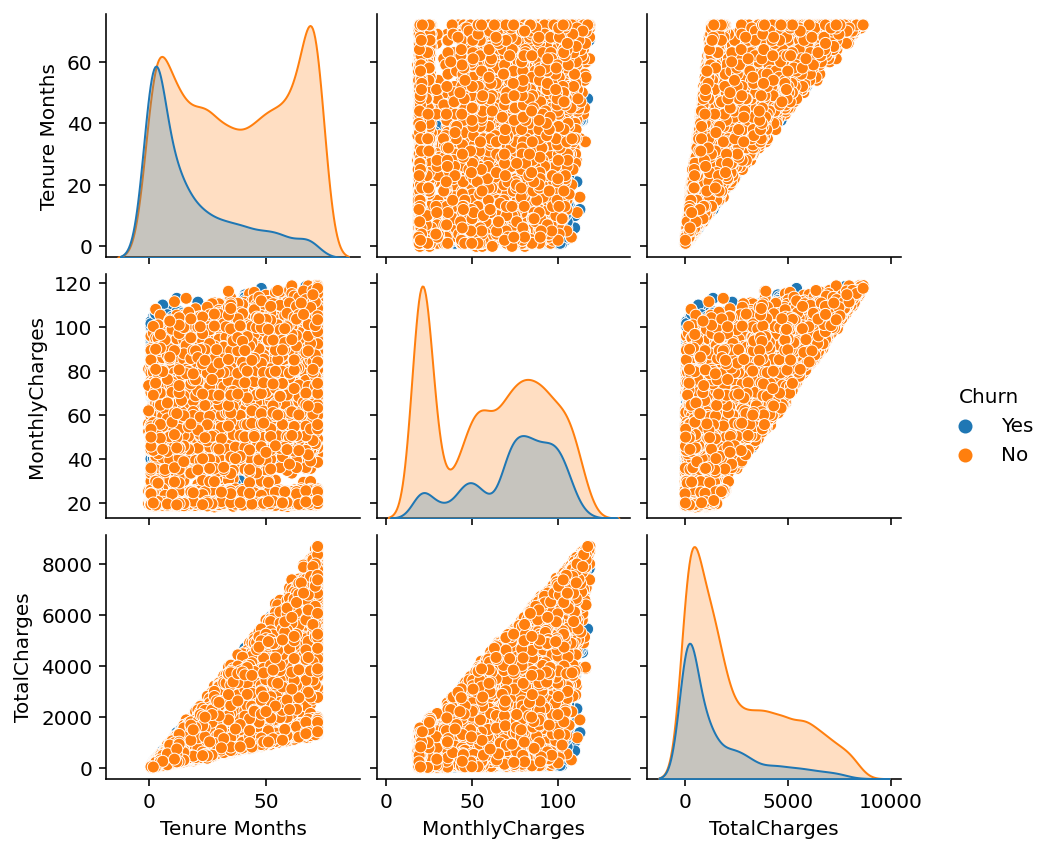

In [23]:
sns.pairplot(df[['Tenure Months', 'MonthlyCharges', 'TotalCharges', 'Churn']], 
             hue='Churn', height=2, aspect=1.1)

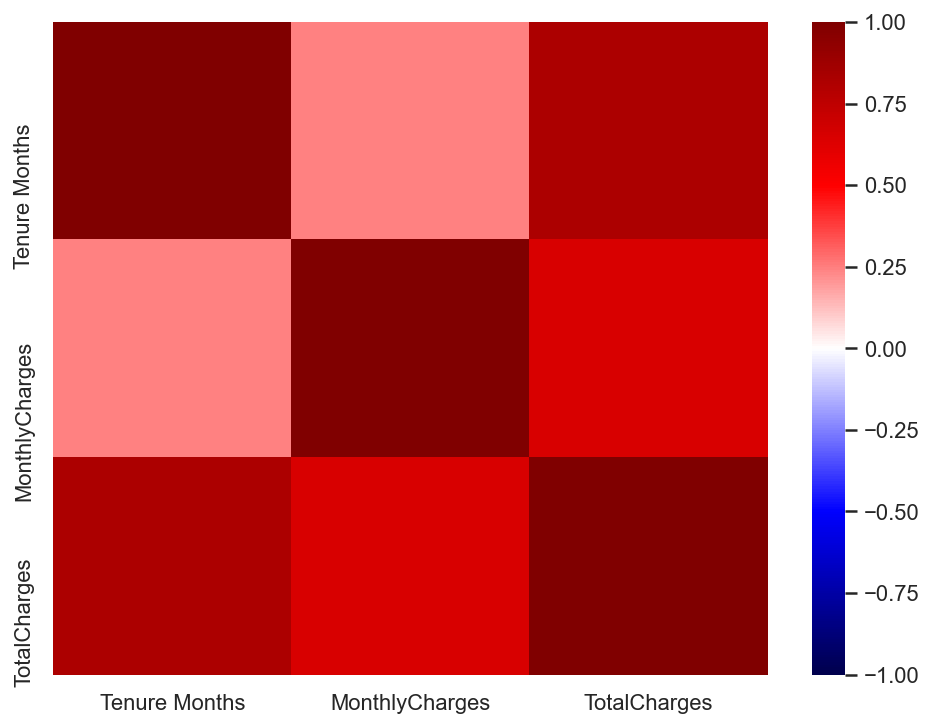

In [24]:
# Correlation Matrix for variables
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10F331B0>,
      dtype=object)

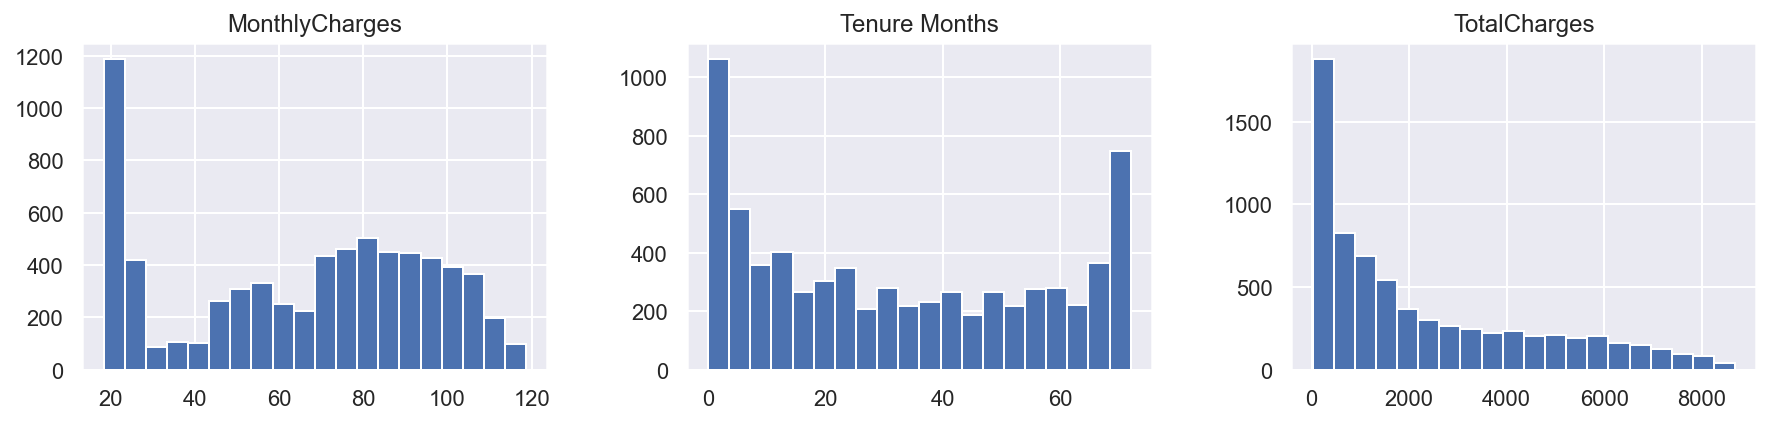

In [25]:
# to view numerical features in charts
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_cols].hist(bins=20, figsize=(10, 7), ax=ax)

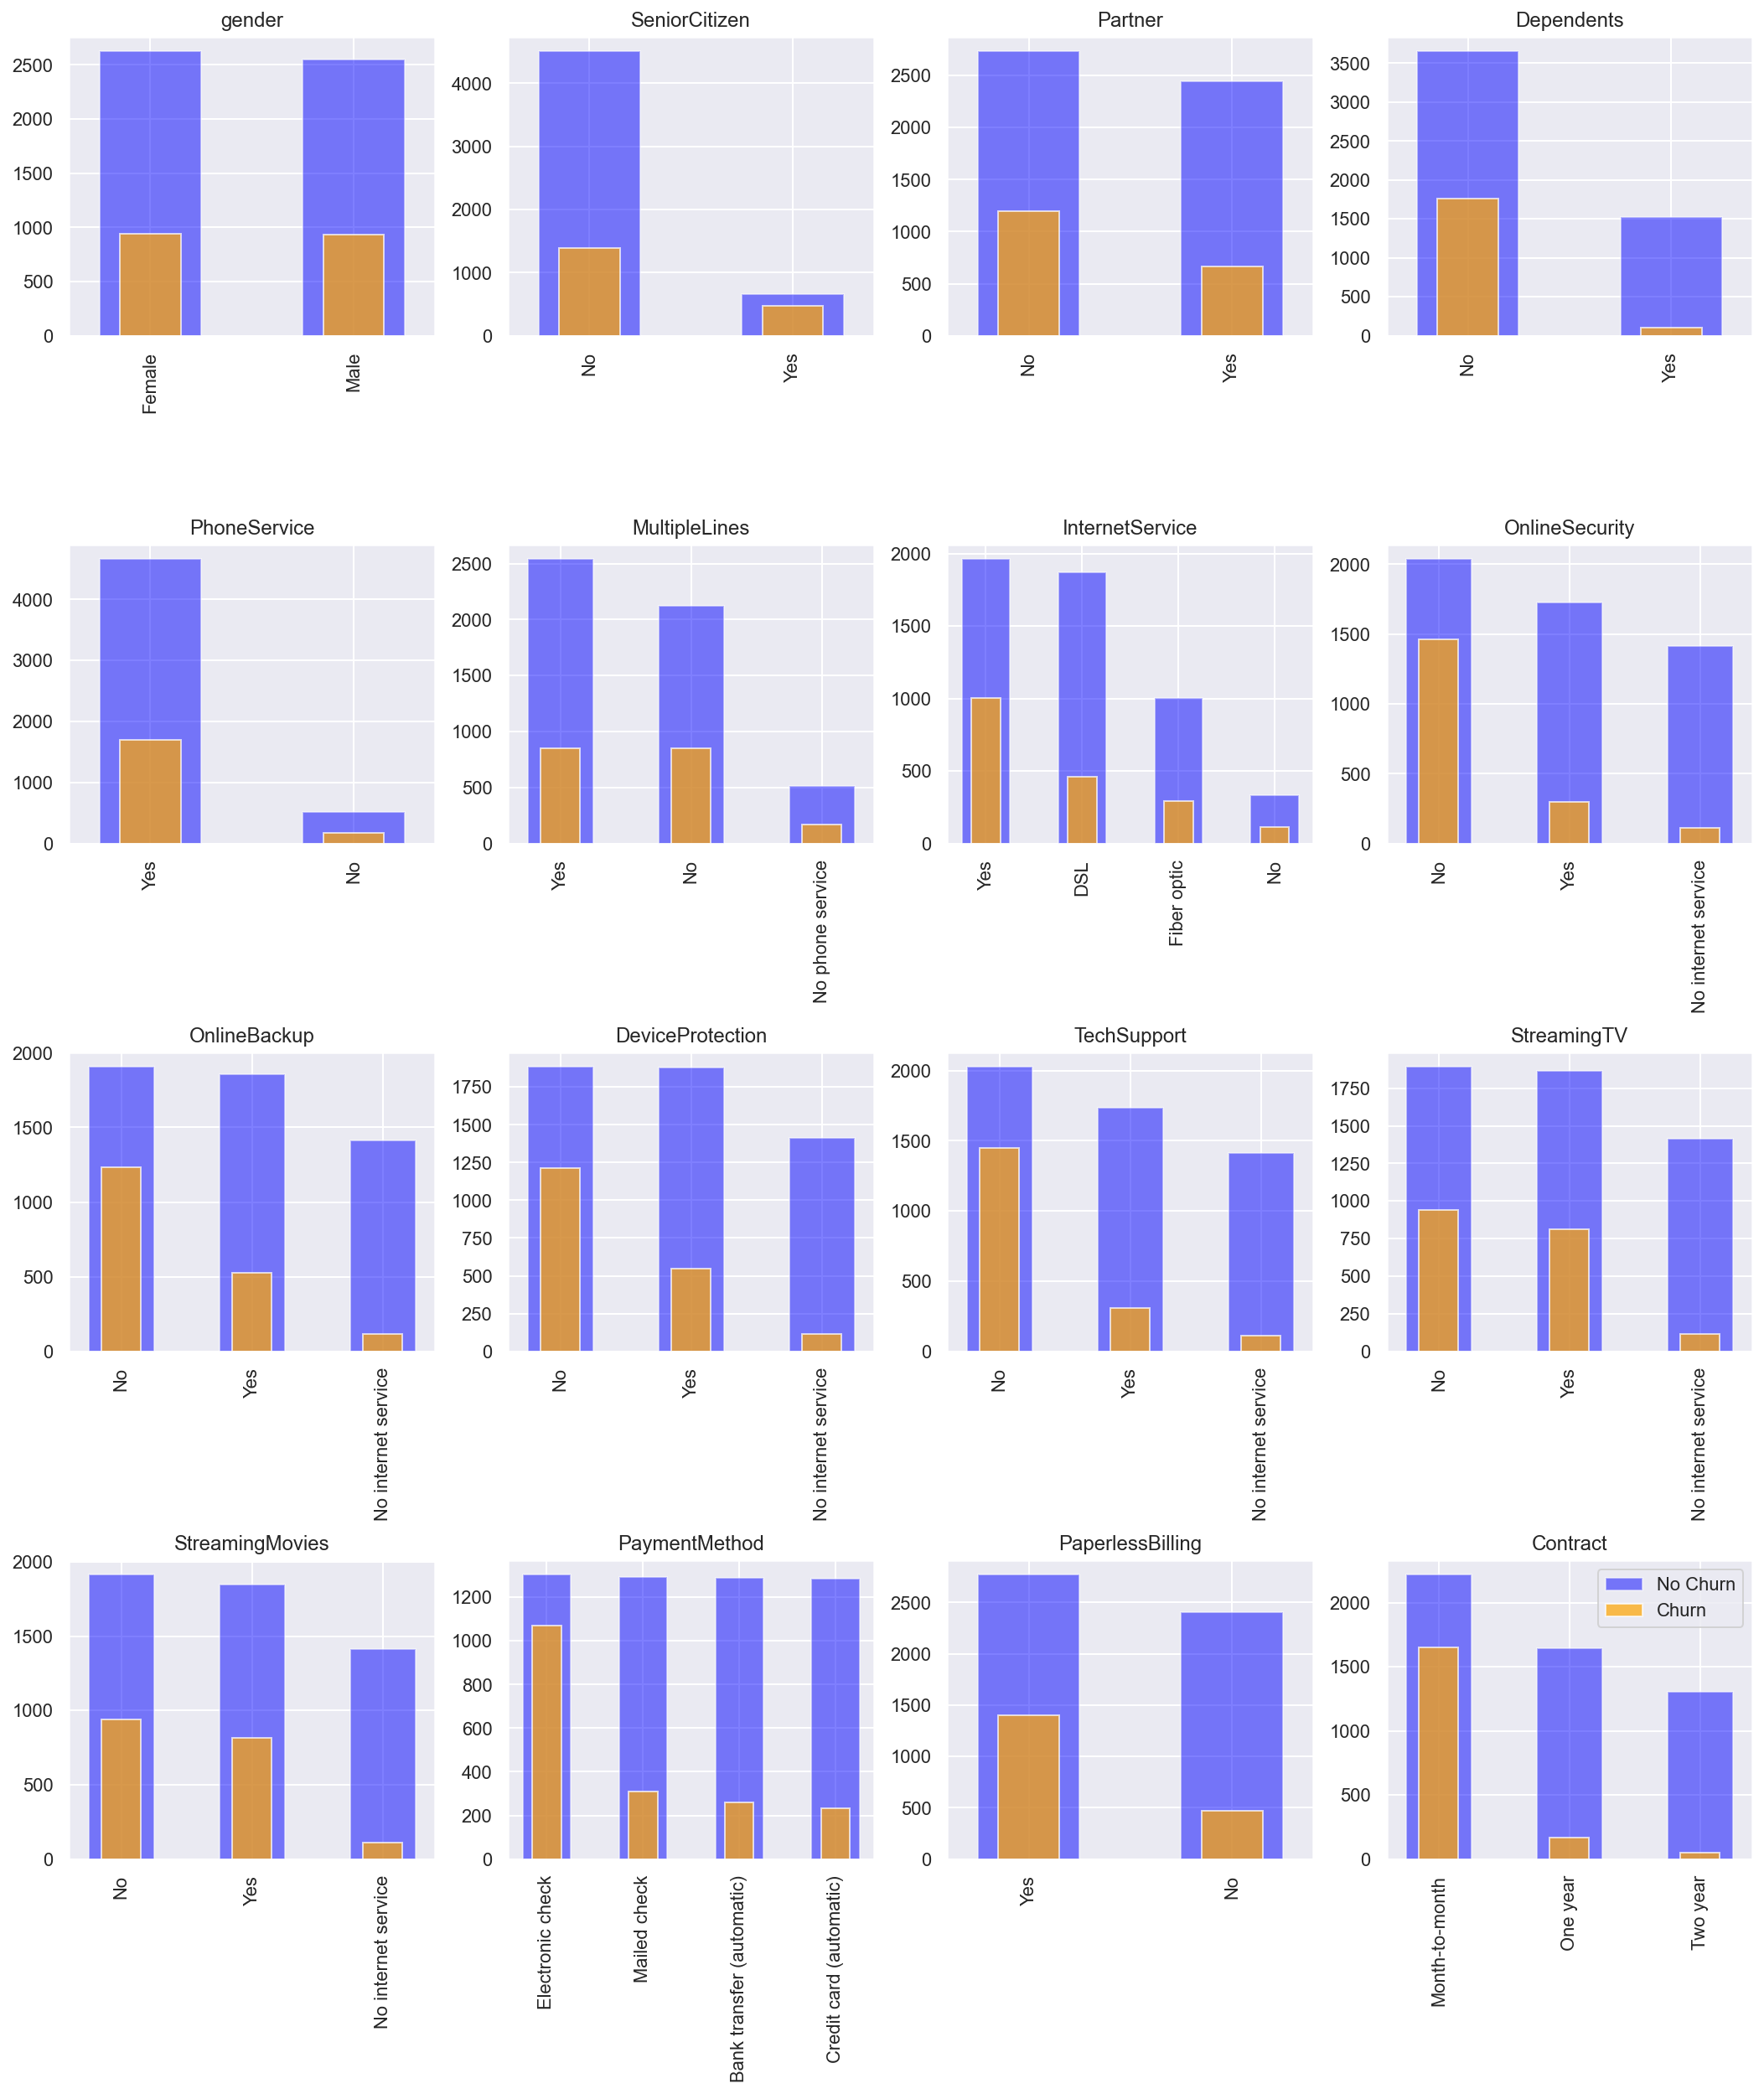

In [26]:
# To analyse categorical feature distribution
# Note: senior citizens and customers without phone service are minority (less represented) in the data
# Note: "No Internet Service" is a repeated feature in 6 other charts

categorical_features = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod',
 'PaperlessBilling',
 'Contract' ]

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
#     df[categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)
    df[df.Churn=='No'][categorical_feature].value_counts().plot(kind ='bar', 
                width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
    df[df.Churn=='Yes'][categorical_feature].value_counts().plot(kind = 'bar', 
                width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

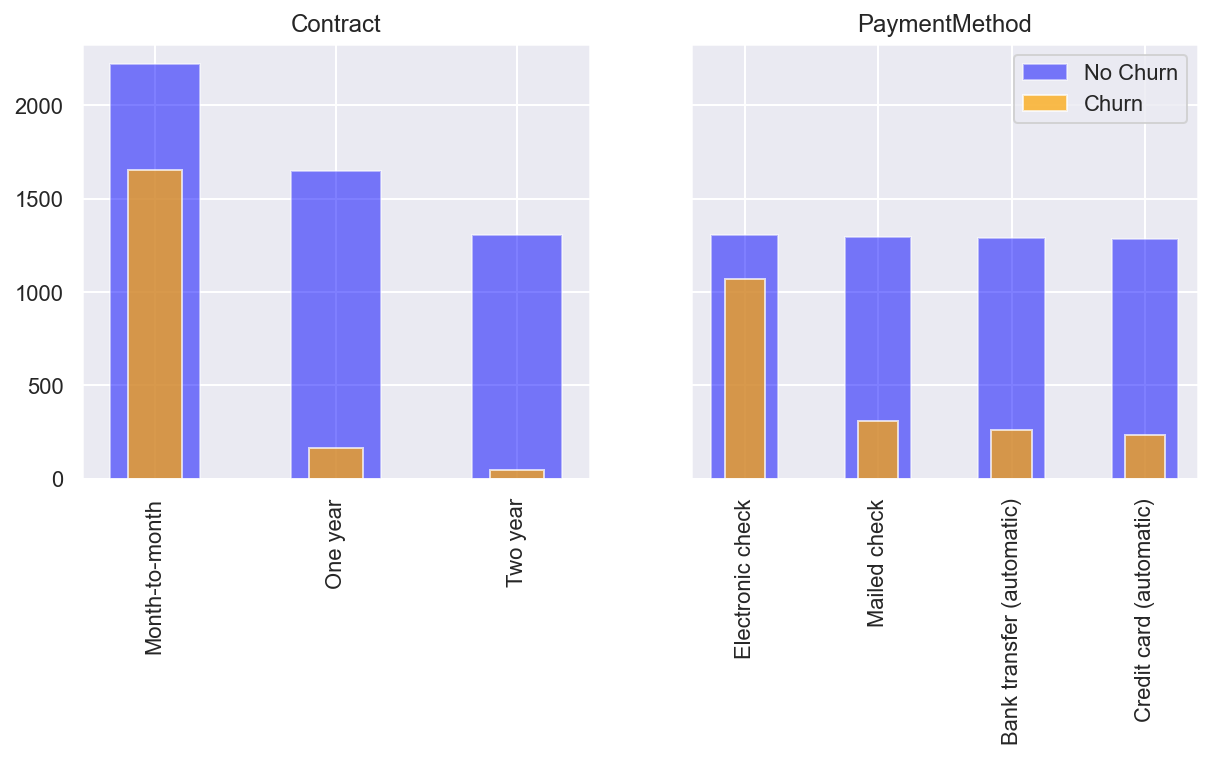

In [27]:
# to look at Contract & Payment Method in relation to the target variable
# note: users who have a month-to-month contract and Electronic check PaymentMethod are more likely to churn
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
df[df.Churn == 'No']['Contract'].value_counts().plot(kind = 'bar', ax=ax[0], color='blue', alpha=0.5).set_title('Contract')
df[df.Churn == 'Yes']['Contract'].value_counts().plot(kind = 'bar', width=.3, ax=ax[0], color='orange', alpha=0.7)
df[df.Churn == 'No']['PaymentMethod'].value_counts().plot(kind = 'bar', ax=ax[1], color='blue', alpha=0.5).set_title('PaymentMethod')
df[df.Churn == 'Yes']['PaymentMethod'].value_counts().plot(kind = 'bar', width=.3, ax=ax[1], color='orange', alpha=0.7)
plt.legend(['No Churn', 'Churn'])

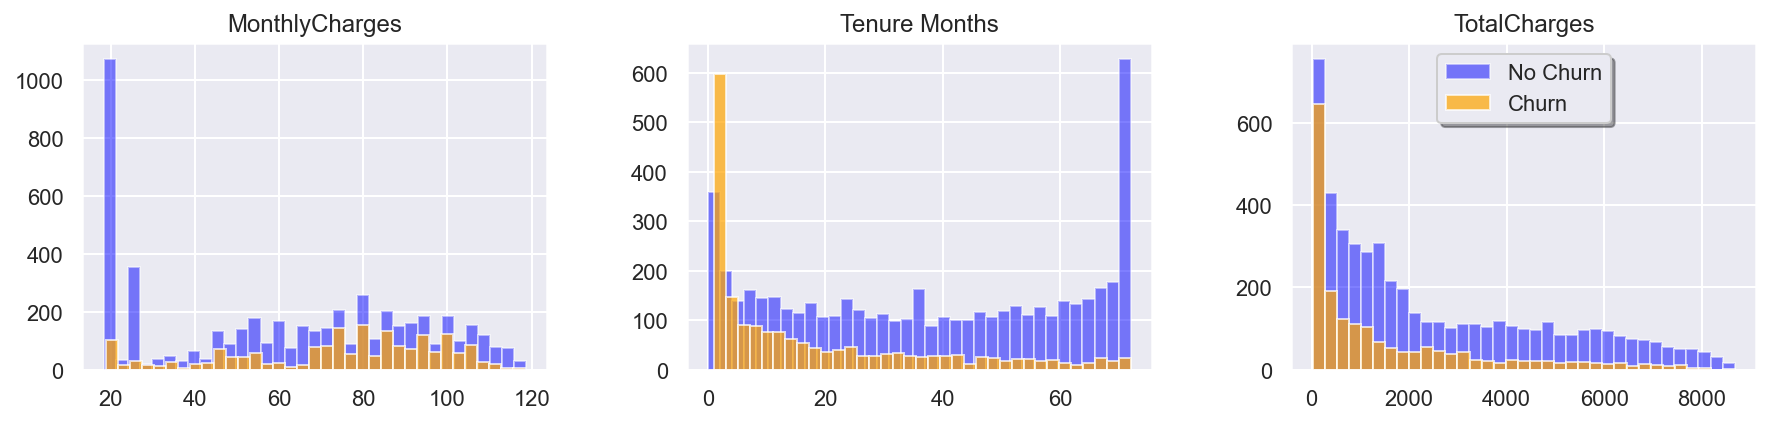

In [28]:
# look at distributions of numerical features in relation to the target variable
# the greater TotalCharges and tenure are the less is the probability of churn

fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[df.Churn == "No"][num_cols].hist(bins=35, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][num_cols].hist(bins=35, color="orange", alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

Observations from above plots :

1: gender:- Has almost equal ratios of Male and Female

2: SeniorCitizen:- Number of Senior Citizens are way less than normal citizens

3: Partner:- Has almost equal ratios of Partners and Non-Partners

4: Dependents:- Number of Dependent users are way less than Non-Dependent Users

5: PhoneService:- People who don't have Phone service are very few.

6: MultipleLines:- MultipleLines are fewer than normal lines and customers who do not have PhoneService do not belong to this category.

7: InternetService:- Fiber optic cable is most common interner service. There is large population which doesn't have internet service

8: OnlineSecurity:- OnlineSecurity is not opted by maximum customers and customers who do not have InternetService do not belong to any category.

9: DeviceProtection:- DeviceProtection is not opted by maximum customers and customers who do not have InternetService do not belong to any category.

10: TechSupport:- TechSupport is not taken by maximum customers and customers who do not have InternetService do not belong to any category.

11: StreamingTV:- StreamingTV is equiprobable between customers who have InternetService and customers who do not have InternetService do not belong to any category.

12: StreamingMovies:- StreamingMovies is equiprobable between customers who have InternetService and customers who do not have InternetService do not belong to any category.

13: Contract:- Month t0 month contract is more likely opted by customers

14: PaperlessBilling:- Most customers have opted for PaperlessBilling

15: PaymentMethod:- Electronic cheques is more preferred method of payment

## Feature Engineering

In [29]:
# change MonthlyCharges to categorical column
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
df['monthlycharges_group'] = df.apply(lambda df:monthlycharges_split(df), axis = 1)

# change TotalCharges to categorical column
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif (df['TotalCharges'] > 2000) & (df['TotalCharges'] <= 4000 ):
        return '2k-4k'
    elif (df['TotalCharges'] > 4000) & (df['TotalCharges'] <= 6000) :
        return '4k-6k'
    elif df['TotalCharges'] > 6000 :
        return '6kplus'
df['totalcharges_group'] = df.apply(lambda df:totalcharges_split(df), axis = 1)

# change Tenure to categorical column
def tenure_split(df) :   
    if df['Tenure Months'] <= 20 :
        return '0-20'
    elif (df['Tenure Months'] > 20) & (df['Tenure Months'] <= 40 ):
        return '20-40'
    elif (df['Tenure Months'] > 40) & (df['Tenure Months'] <= 60) :
        return '40-60'
    elif df['Tenure Months'] > 60 :
        return '60plus'
df['tenure_group'] = df.apply(lambda df:tenure_split(df), axis = 1)

# # Separating categorical and numerical columns
# Id_col     = ['customerID']
# target_col = ['Churn']
# cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
# cat_cols   = [x for x in cat_cols if x not in target_col]
# num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]

# target_col

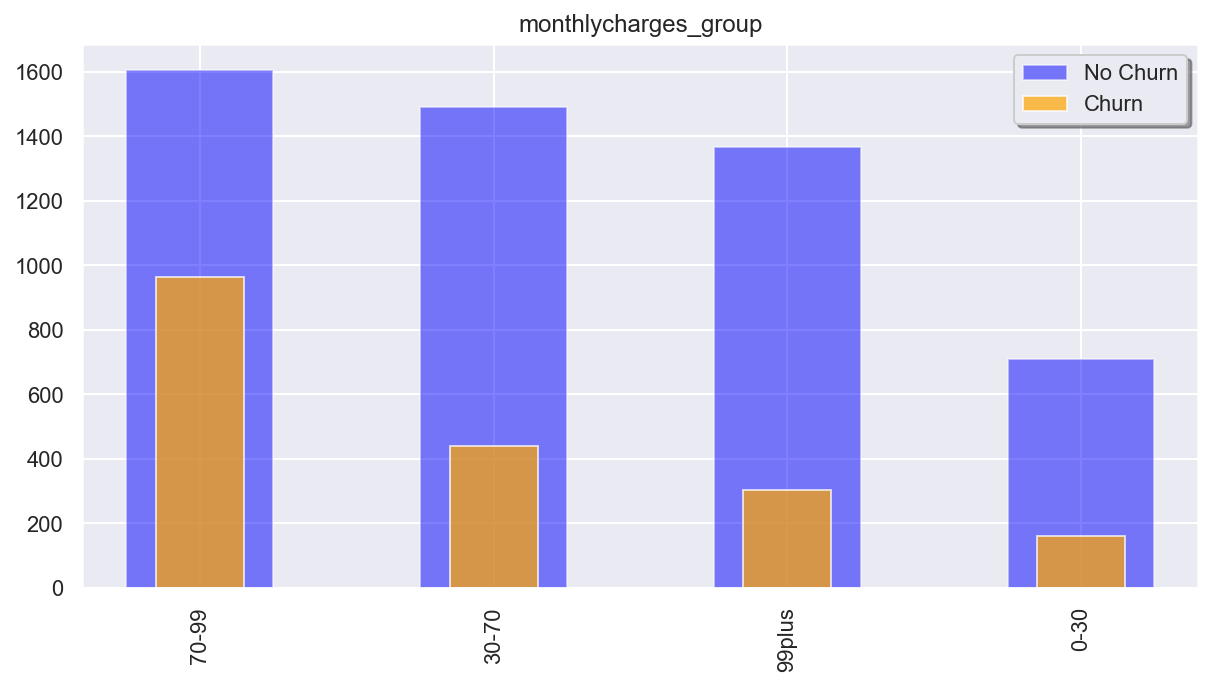

In [30]:
# new features monthlycharges_group
plt.figure(figsize = [10,5])
df[df.Churn == "No"]['monthlycharges_group'].value_counts().plot(kind = 'bar', color="blue", alpha=0.5).set_title('monthlycharges_group')
df[df.Churn == "Yes"]['monthlycharges_group'].value_counts().plot(kind = 'bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

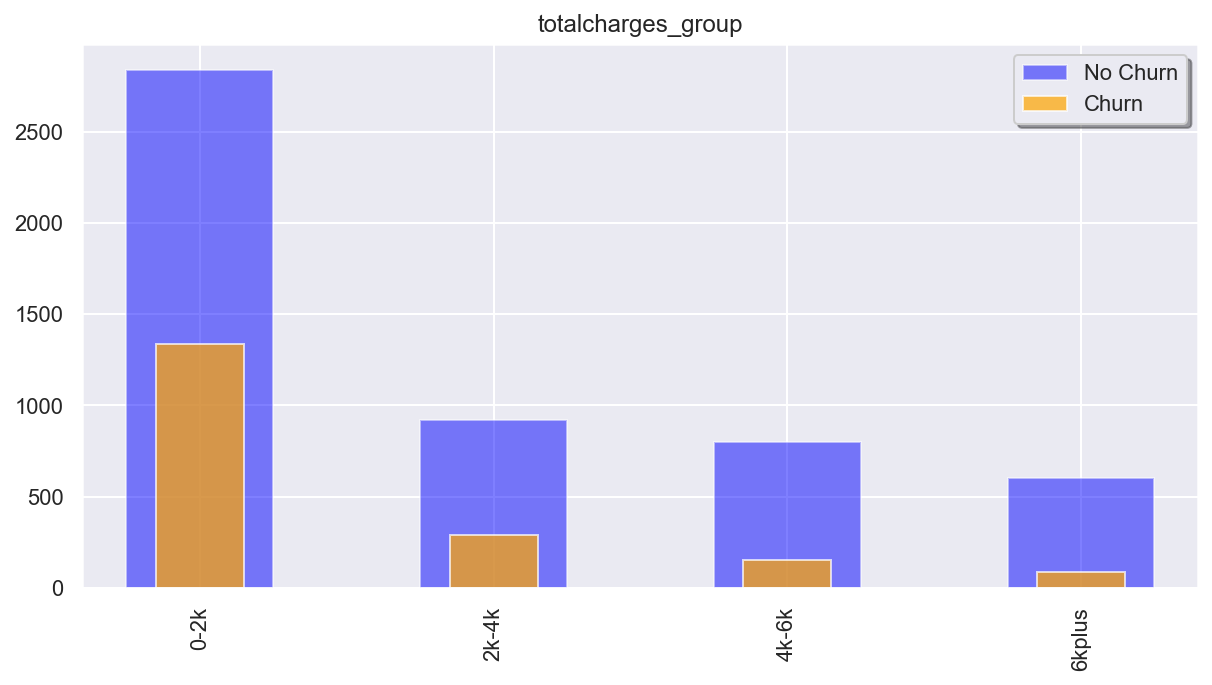

In [31]:
# new features totalcharges_group
plt.figure(figsize = [10,5])
df[df.Churn == "No"]['totalcharges_group'].value_counts().plot(kind = 'bar', color="blue", alpha=0.5).set_title('totalcharges_group')
df[df.Churn == "Yes"]['totalcharges_group'].value_counts().plot(kind = 'bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

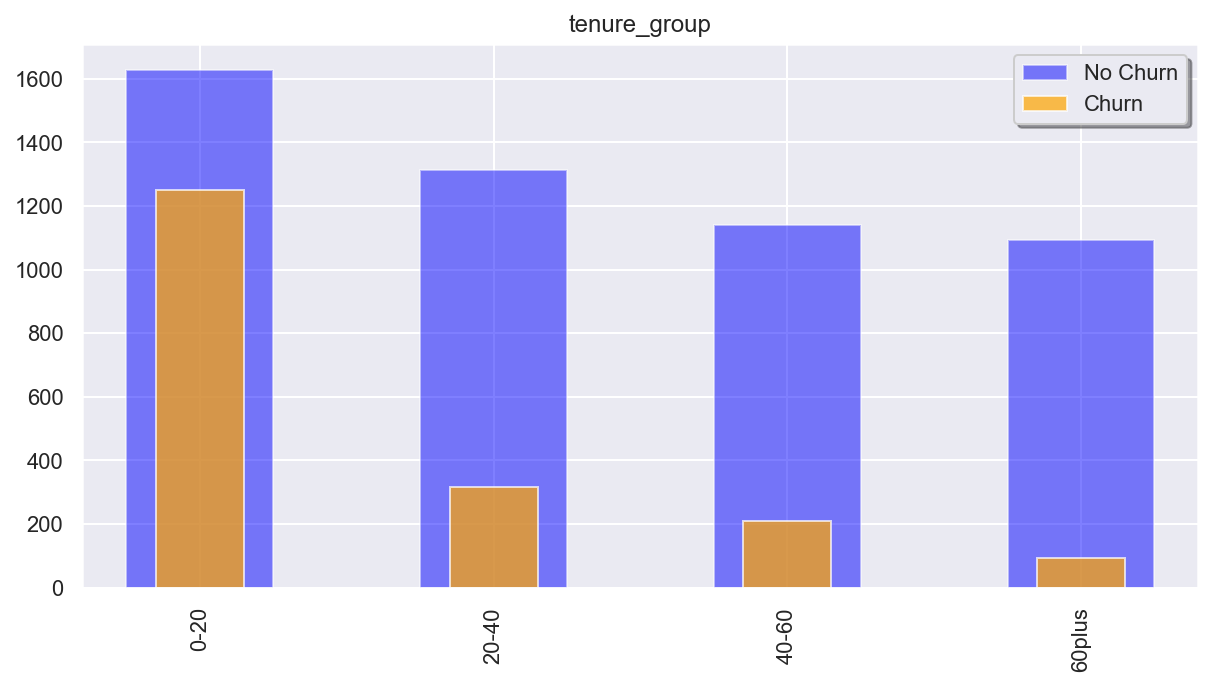

In [32]:
# new features tenure_group
plt.figure(figsize = [10,5])
df[df.Churn == "No"]['tenure_group'].value_counts().plot(kind = 'bar', color="blue", alpha=0.5).set_title('tenure_group')
df[df.Churn == "Yes"]['tenure_group'].value_counts().plot(kind = 'bar', color="orange", alpha=0.7, width=0.3)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=1)

In [33]:
# store df to csv file
df.to_csv('df.csv', index=False)

# # backup original df for reference
# df_telcom_org = df.copy()   
# df_telcom_org

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Tenure Months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthlycharges_group,totalcharges_group,tenure_group
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30-70,0-2k,0-20
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,70-99,0-2k,0-20
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,99plus,0-2k,0-20
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,99plus,2k-4k,20-40
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,99plus,4k-6k,40-60


In [35]:
df = pd.read_csv('df.csv')
df

,gender,SeniorCitizen,Partner,Dependents,Tenure Months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,monthlycharges_group,totalcharges_group,tenure_group
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30-70,0-2k,0-20
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,70-99,0-2k,0-20
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,99plus,0-2k,0-20
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,99plus,2k-4k,20-40
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,99plus,4k-6k,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,...,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0-30,0-2k,60plus
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.80,1990.50,No,70-99,0-2k,20-40
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,99plus,6kplus,60plus
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0-30,0-2k,0-20


In [36]:
# Data preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# customer id col
Id_col     = ['customerID']
# Target columns
target_col = ['Churn']
#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df, columns = multi_cols)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df1 = df.drop(columns = num_cols, axis = 1)
df1 = df1.merge(scaled, left_index=True, right_index=True, how = "left")

# note: df has 21 columns including unscaled num_cols; df1 has 54 columns including scaled num_cols
# I defined 2 separate df & df1 for comparison, to check if the columns are correctly labelled after encoding/get_dummies

In [37]:
# check if there is any null fields (ie, ensure all fields are filled)

df1 = df1.dropna(how='all')

In [38]:
df1[df1.TotalCharges.isnull()]
#df1 = df1.dropna (subset = ["TotalCharges"], inplace = True)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,Tenure Months,MonthlyCharges,TotalCharges
2234,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,-1.318165,-0.405867,NaN
2438,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,-1.318165,-1.479388,NaN
2568,0,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,-1.318165,0.534710,NaN
2667,1,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,-1.318165,-1.296590,NaN
2856,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,-1.318165,-0.289541,NaN
4331,1,0,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,-1.318165,-1.492682,NaN
4687,1,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,-1.318165,-1.309885,NaN
5104,0,0,1,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,-1.318165,-1.487697,NaN
5719,1,0,1,1,1,1,0,1,0,0,...,0,0,0,1,0,0,0,-1.318165,-1.497668,NaN
6772,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,-1.318165,0.285440,NaN


In [39]:
df1 = df1.dropna()
df1[df1.TotalCharges.isnull()]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,totalcharges_group_2k-4k,totalcharges_group_4k-6k,totalcharges_group_6kplus,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,Tenure Months,MonthlyCharges,TotalCharges


In [40]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'InternetService_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',


In [41]:
df1.dtypes

gender                                       int32
SeniorCitizen                                int32
Partner                                      int32
Dependents                                   int32
PhoneService                                 int32
PaperlessBilling                             int32
Churn                                        int32
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
InternetService_Yes                          uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet service             uint8
OnlineBackup_Yes               

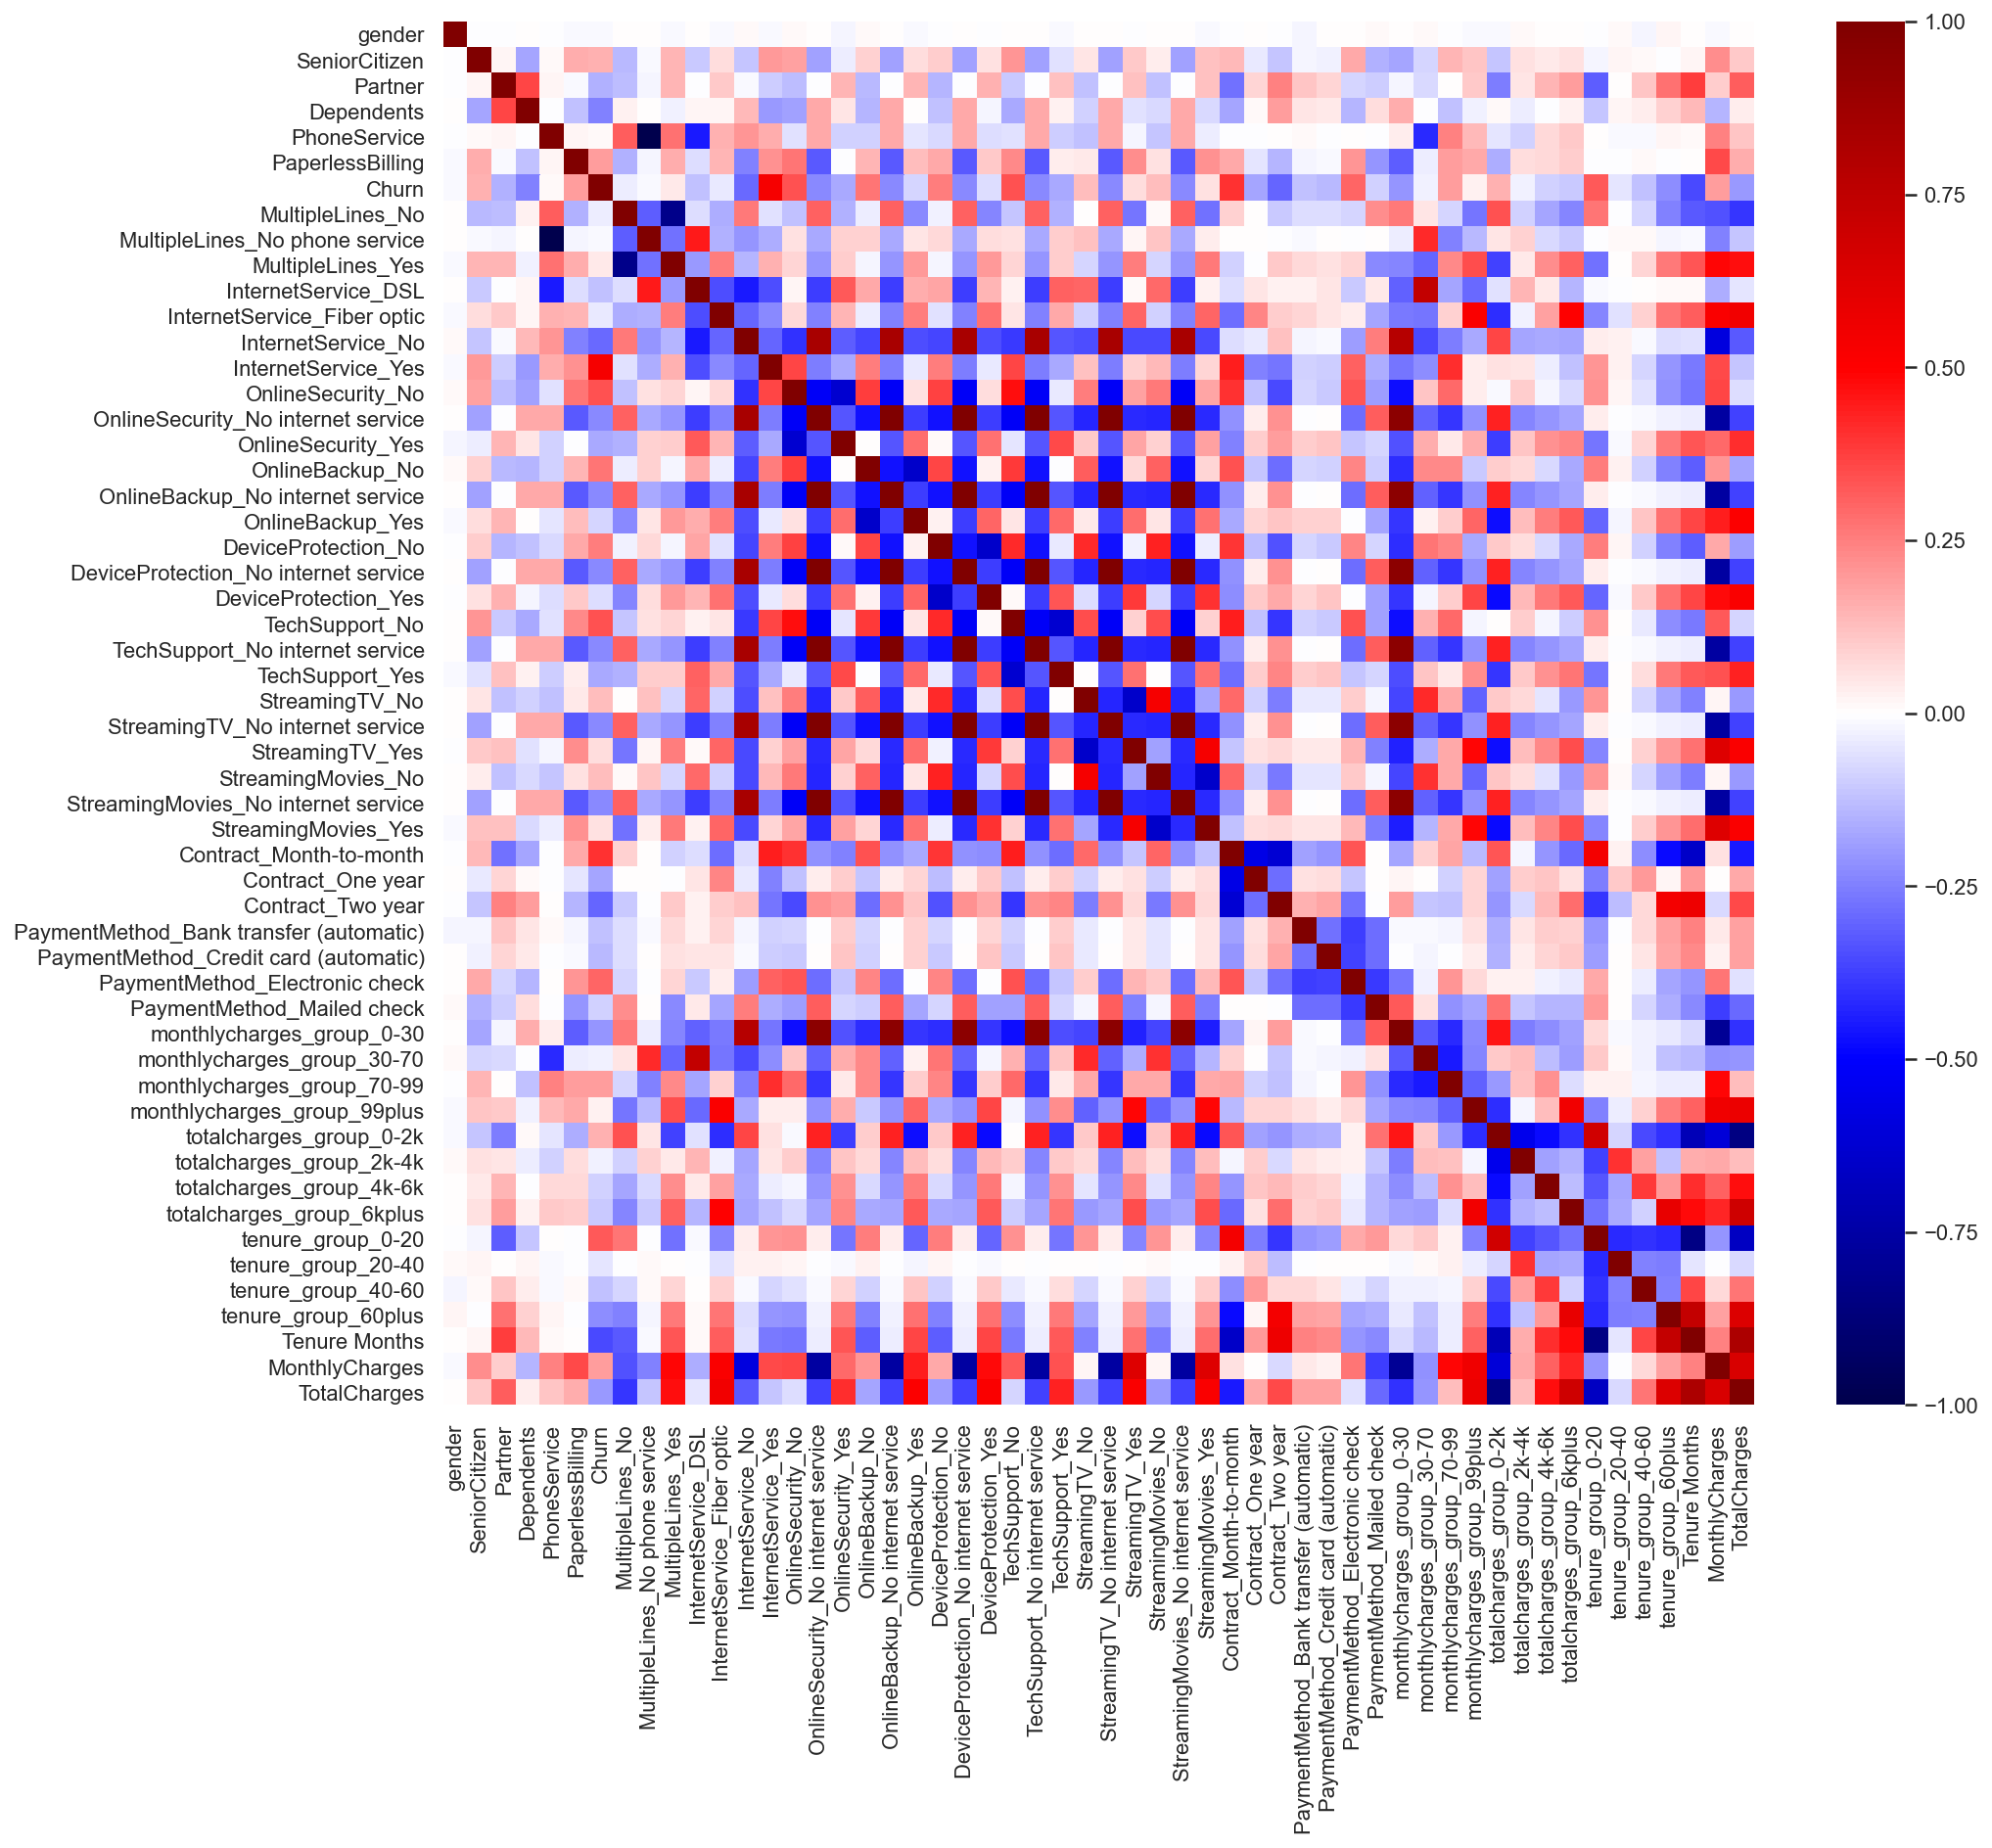

In [42]:
# Correlation Matrix for variables
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(df1.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

In [43]:
# drop 'customerID' column, feature not needed in model selection
#df1 = df1.drop('customerID', axis=1)

# there are a lot of repeated features (no internet service), so drop them
df1 = df1.drop(columns=['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 
                        'DeviceProtection_No internet service', 'TechSupport_No internet service', 
                        'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)

# original 54 columns, reduced to 47 columns

In [44]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'InternetService_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'monthlycharges_group_0-30', 'monthlycharges_group_30-70',
       'monthlycharges_group_70-99', 'monthlycharges_group_99plus',
       'totalcharges_group_0-2k', 'tota

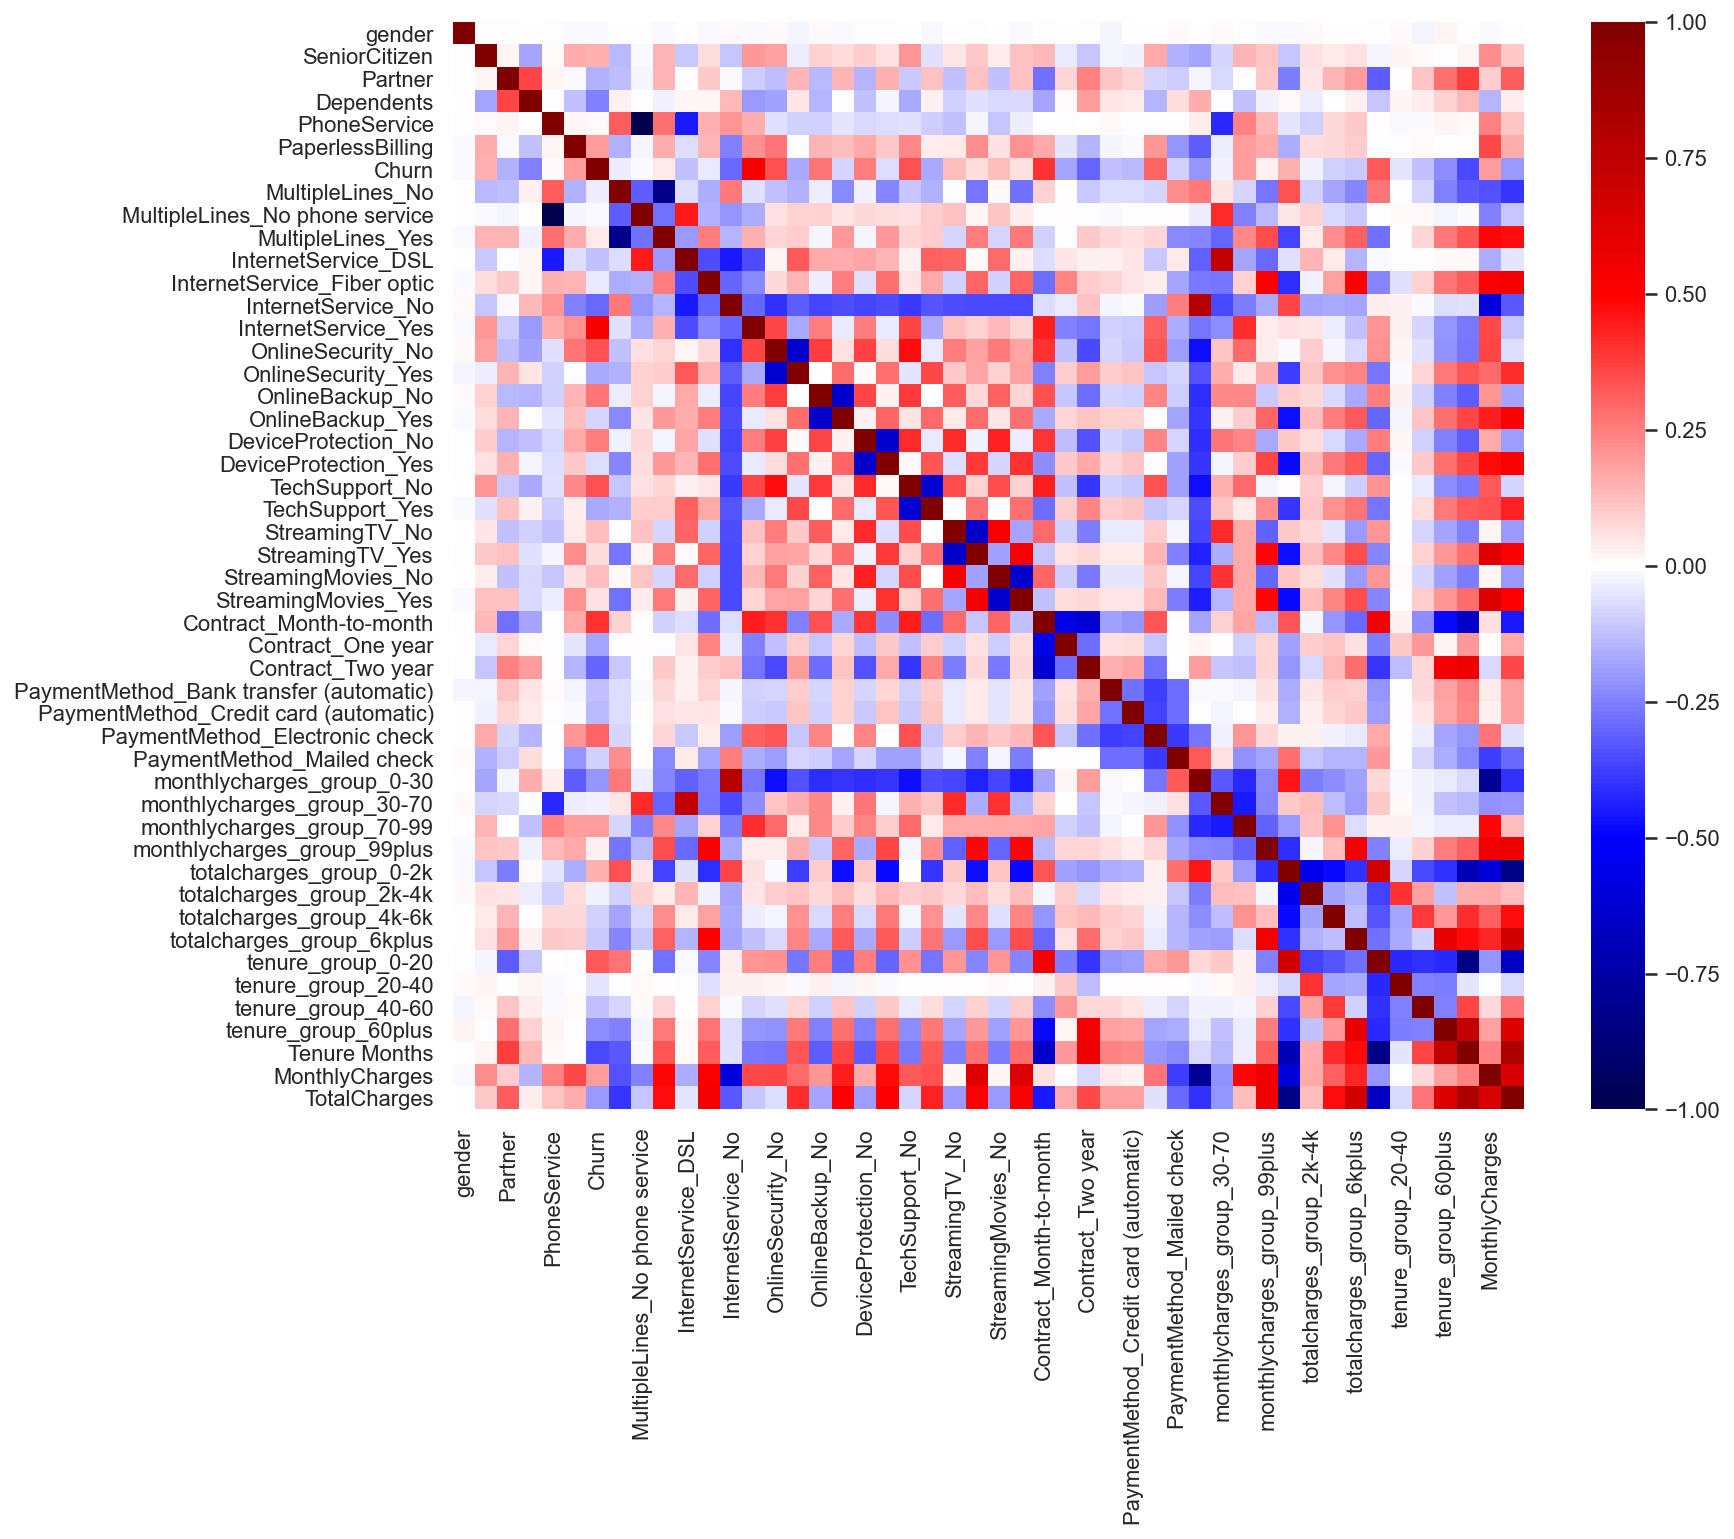

In [45]:
# Correlation Matrix for variables
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df1.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

In [46]:
# store df1 to csv file
df1.to_csv('df1.csv', index=False)

## Feature Selection

In [2]:
df1 = pd.read_csv(r"C:\Users\admin\Desktop\Interview\tel_churn_1.csv")

df1.head()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,1,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,3,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,4,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [4]:
df1 = df1.drop('Unnamed: 0',axis=1)
df1.isnull().sum()
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [5]:
X, y = df1.drop('Churn',axis=1), df1[['Churn']]

import statsmodels.api as sm
X = sm.add_constant(X)  # need to add this to define the Intercept
# model / fit / summarize results
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        07:47:46   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0612      0.033      1.853      0.064      -0.004       0.126
SeniorCitizen                               0.0445      0.013      3.419      0.001       0.019       0.070
tenure                                     -0.0020      0.001     -3.917      0.000      -0.003      -0.001
MonthlyCharges                             -0.0013      0.004     -0.303      0.762      -0.010       0.007
TotalCharges                            -4.438e-05   6.48e-06     -6.852      0.000   -5.71e-05   -3.17e-05
gender_Female                               0.0323      0.017      1.892      0.058      -0.001       0.066
gender_Male                                 0.0289      0.017      1.685      0.092      -0.005       0.063
Partner_No                                  0.0310      0.017      1.780      0.075      -0.003       0.065
Partner_Yes                                 0.0302      0.017      1.742      0.082      -0.004       0.064
Dependents_No                               0.0407      0.017      2.337      0.019       0.007       0.075
Dependents_Yes                              0.0205      0.018      1.167      0.243      -0.014       0.055
PhoneService_No                             0.0194      0.015      1.296      0.195      -0.010       0.049
PhoneService_Yes                            0.0418      0.047      0.886      0.376      -0.051       0.134
MultipleLines_No                           -0.0084      0.014     -0.614      0.539      -0.035       0.018
MultipleLines_No phone service              0.0194      0.015      1.296      0.195      -0.010       0.049
MultipleLines_Yes                           0.0502      0.035      1.437      0.151      -0.018       0.119
InternetService_DSL                        -0.0704      0.032     -2.191      0.028      -0.133      -0.007
InternetService_Fiber optic                 0.1401      0.078      1.804      0.071      -0.012       0.292
InternetService_No                         -0.0084      0.013     -0.649      0.517      -0.034       0.017
OnlineSecurity_No                           0.0561      0.013      4.186      0.000       0.030       0.082
OnlineSecurity_No internet service         -0.0084      0.013     -0.649      0.517      -0.034       0.017
OnlineSecurity_Yes                          0.0136      0.034      0.395      0.693      -0.054       0.081
OnlineBackup_No                             0.0405      0.013      3.047      0.002       0.014       0.067
OnlineBackup_No internet service           -0.0084      0.013     -0.649      0.517      -0.034       0.017
OnlineBackup_Yes                            0.0292      0.034      0.851      0.395      -0.038       0.096
DeviceProtection_No                         0.0325      0.0

In [6]:
## to find significant features using LassoCV (all X_scaled)
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

print('Use LassoCV to find the optimal ALPHA value for L1 regularization')
# Scale the Predictors on both the train and validation set
std = StandardScaler()
std.fit(X.values)
X_scaled = std.transform(X.values)
print('X_scaled', X_scaled.shape)
# Run the cross validation, find the best alpha, refit the model on all the data with that alpha
alphavec = 10**np.linspace(-3,3,200)   # alpha varies from 0.001 to 1000
lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_scaled, y)
# This is the best alpha value found
print('LASSO best alpha: ', lasso_model.alpha_ )
# display all coefficients in the model with optimal alpha
list(zip(X.columns, lasso_model.coef_)) 

Use LassoCV to find the optimal ALPHA value for L1 regularization
X_scaled (7032, 46)
LASSO best alpha:  0.001320088400831418


[('const', 0.0),
 ('SeniorCitizen', 0.015610090992137783),
 ('tenure', -0.05180919611485191),
 ('MonthlyCharges', 0.013609217038613966),
 ('TotalCharges', -0.0908381713287267),
 ('gender_Female', 0.0005098976872709351),
 ('gender_Male', -5.810040856968965e-18),
 ('Partner_No', 0.0),
 ('Partner_Yes', -0.0),
 ('Dependents_No', 0.00865363490337162),
 ('Dependents_Yes', -7.578314161263864e-17),
 ('PhoneService_No', 0.0),
 ('PhoneService_Yes', -0.0),
 ('MultipleLines_No', -0.021150493149273496),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0016195281270567938),
 ('InternetService_DSL', -0.0),
 ('InternetService_Fiber optic', 0.08077714535742359),
 ('InternetService_No', -0.0),
 ('OnlineSecurity_No', 0.026661212059044592),
 ('OnlineSecurity_No internet service', -0.0),
 ('OnlineSecurity_Yes', -0.0),
 ('OnlineBackup_No', 0.010545531269877362),
 ('OnlineBackup_No internet service', -0.0),
 ('OnlineBackup_Yes', -0.0),
 ('DeviceProtection_No', 0.0021149956028881276),
 ('Dev

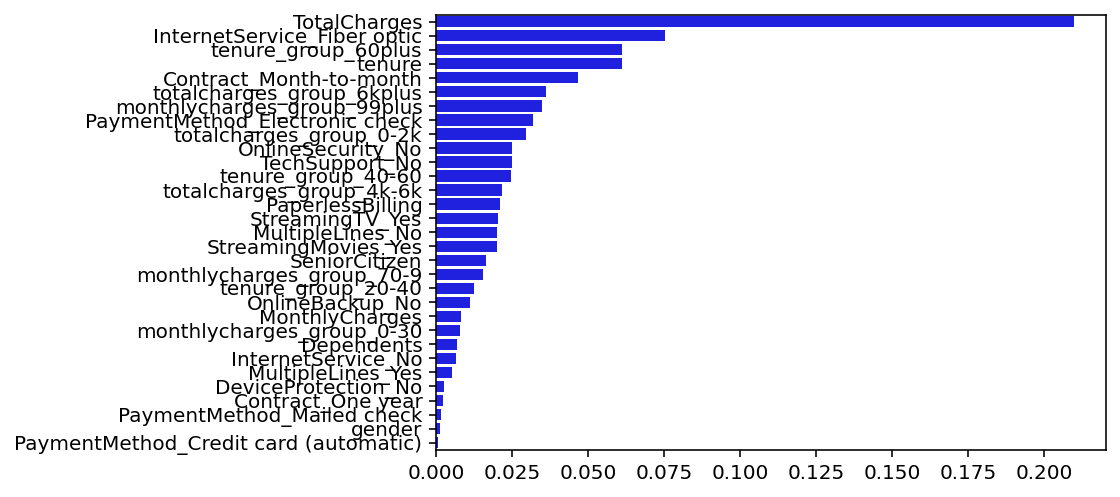

In [7]:
# see if you can extract the above results using Regular Expression

plot_feature = ['TotalCharges', 'InternetService_Fiber optic', 'tenure_group_60plus', 'tenure', 'Contract_Month-to-month', 
                'totalcharges_group_6kplus', 'monthlycharges_group_99plus', 'PaymentMethod_Electronic check', 
                'totalcharges_group_0-2k', 'OnlineSecurity_No', 'TechSupport_No', 'tenure_group_40-60', 
                'totalcharges_group_4k-6k', 'PaperlessBilling', 'StreamingTV_Yes', 'MultipleLines_No', 'StreamingMovies_Yes', 
                'SeniorCitizen', 'monthlycharges_group_70-9', 'tenure_group_20-40', 'OnlineBackup_No', 'MonthlyCharges', 
                'monthlycharges_group_0-30', 'Dependents', 'InternetService_No', 'MultipleLines_Yes', 'DeviceProtection_No', 
                'Contract_One year', 'PaymentMethod_Mailed check', 'gender', 'PaymentMethod_Credit card (automatic)']

lasso_coeff = [0.209954752, 0.075144498, 0.061184581, 0.061182631, 0.046630292, 0.036007041, 0.034846244, 0.031775227, 
               0.029645254, 0.024949481, 0.024875392, 0.024679595, 0.021639644, 0.020966614, 0.020143496, 0.019954793, 
               0.019936301, 0.016463024, 0.015436581, 0.012221305, 0.011015587, 0.008054301, 0.007701626, 0.006895811, 
               0.00642757, 0.005009993, 0.002481356, 0.002102214, 0.001449537, 0.001066809, 0.000525379]

sns.barplot(y = plot_feature, x = lasso_coeff, color='b')

Text(0.5, 1.0, 'Top Features derived by Random Forest')

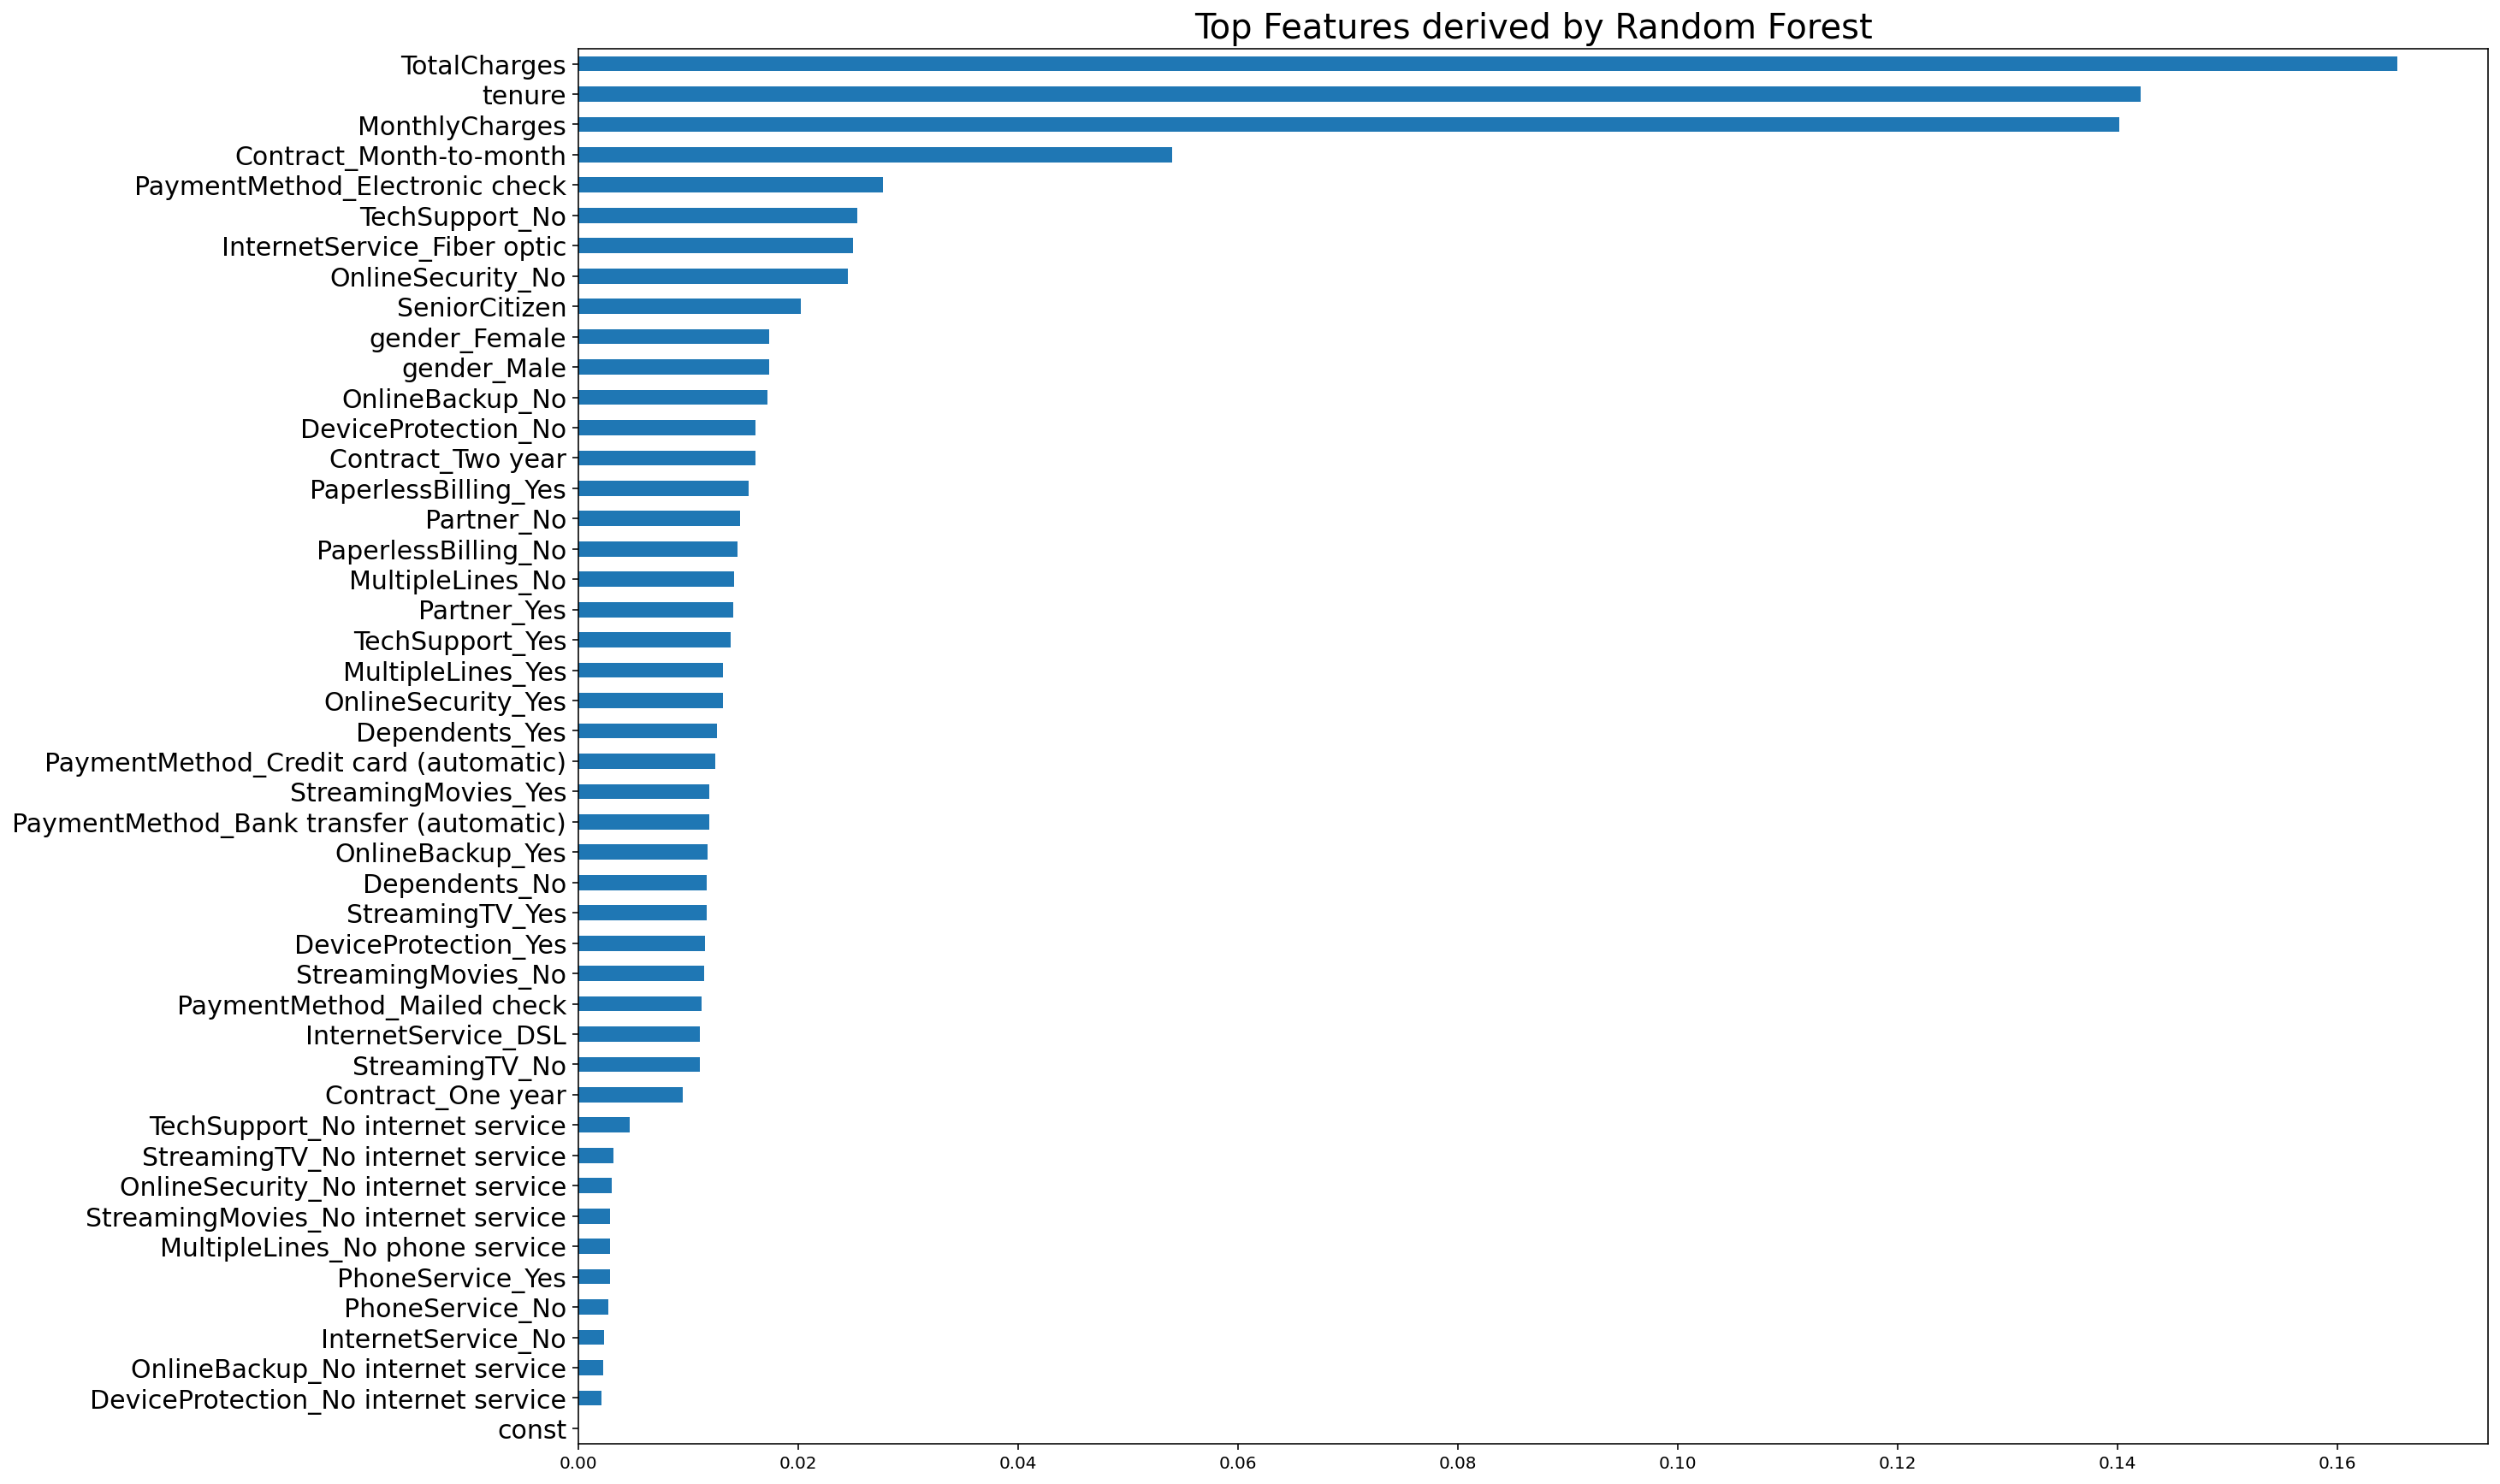

In [8]:
## To look for top features using Random Forest
# Create decision tree classifer object
rfc = RandomForestClassifier(random_state=0, n_estimators=100)

# Train model, note that NO scaling is required
model = rfc.fit(X, y)

# Plot the top features based on its importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(47)   # can adjust based on how many top features you want
   .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) # Ensures that the feature with the most importance is on top, in descending order

plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

## Model Selection

In [9]:
df1 = pd.read_csv('df1.csv')
X, y = df1.drop('Churn',axis=1), df1[['Churn']]

In [10]:
# # This section is used to select the top features (subset, instead of all features) to run on the model 
# X = df1[ ['tenure_group_0-20', 'tenure_group_60plus', 'monthlycharges_group_0-30', 'monthlycharges_group_70-99', 
#           'totalcharges_group_6kplus', 'totalcharges_group_0-2k', 'SeniorCitizen', 'InternetService_Fiber optic', 
#           'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 
#           'PaymentMethod_Electronic check', 'PaymentMethod_Credit card (automatic)', 'PaperlessBilling', 
#           'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'StreamingTV_No', 'StreamingMovies_No', 
#           'TotalCharges', 'tenure'] ]
# y = df1[['Churn']]

In [11]:
# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=71)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

def model_report(model_name, model):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))   # should use cross validation

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()
  
    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []

X_train (5625, 47)
y_train (5625, 1)
X_test (1407, 47)
y_test (1407, 1)


In [12]:
#print('\n"""""" GaussianNB """"""')
#time1 = time.time()
#gnb = GaussianNB()
#model_report('GaussianNB', gnb)

#model_list.append('GaussianNB')
#f1_list.append(model_f1)
#auc_list.append(model_auc)
#ll_list.append(model_ll)
#roc_auc_list.append(model_roc_auc)
#time_list.append(time.time() - time1)

#print('\n"""""" BernoulliNB """"""')
#time1 = time.time()
#bnb = BernoulliNB()
#model_report('BernoulliNB', bnb)

#model_list.append('BernoulliNB')
#f1_list.append(model_f1)
#auc_list.append(model_auc)
#ll_list.append(model_ll)
#roc_auc_list.append(model_roc_auc)
#time_list.append(time.time() - time1)

### this model does not work
# print('\n"""""" MultinomialNB """"""')
# mnb = MultinomialNB()
# model_report('MultinomialNB', mnb)

In [13]:
# Optimal threshold 0.983
# Precision: 0.5640,   Recall: 0.7231,   F1 Score: 0.6337
# GaussianNB confusion matrix: 
#  [[799 218]
#  [108 282]]
# GaussianNB Log-loss: 2.3984
# GaussianNB roc_auc_score: 0.7554
# GaussianNB AUC: 0.8265
    
# Optimal threshold 0.764
# Precision: 0.5849,   Recall: 0.7154,   F1 Score: 0.6436
# BernoulliNB confusion matrix: 
#  [[819 198]
#  [111 279]]
# BernoulliNB Log-loss: 1.1281
# BernoulliNB roc_auc_score: 0.7563
# BernoulliNB AUC: 0.8355

In [15]:
print('\n"""""" LogisticRegression """"""')
print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
score_list = []
c_list = 10**np.linspace(-3,3,200)
for c in c_list:
    logit = LogisticRegression(C = c)
    cvs = (cross_val_score(logit, X_train.values, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
optimal_c = float(c_list[score_list.index(max(score_list))])
print('optimal value of C = {:.3f}'.format(optimal_c))

time1 = time.time()
logit = LogisticRegression(C = optimal_c)
model_report('LogisticRegression', logit)

model_list.append('LogisticRegression')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)


"""""" LogisticRegression """"""

Search for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold(5) Cross Validation on train data
0.4374, 0.4527, 0.4675, 0.4877, 0.5021, 0.5118, 0.5196, 0.5284, 0.5349, 0.5448, 0.5530, 0.5604, 0.5644, 0.5701, 0.5794, 0.5843, 0.5911, 0.5952, 0.6043, 0.6091, 0.6142, 0.6188, 0.6226, 0.6231, 0.6258, 0.6314, 0.6333, 0.6369, 0.6419, 0.6426, 0.6445, 0.6475, 0.6512, 0.6538, 0.6549, 0.6552, 0.6562, 0.6586, 0.6601, 0.6609, 0.6623, 0.6651, 0.6679, 0.6689, 0.6702, 0.6722, 0.6745, 0.6755, 0.6782, 0.6784, 0.6799, 0.6791, 0.6793, 0.6805, 0.6813, 0.6818, 0.6835, 0.6854, 0.6864, 0.6878, 0.6885, 0.6897, 0.6907, 0.6907, 0.6907, 0.6905, 0.6907, 0.6909, 0.6923, 0.6923, 0.6922, 0.6922, 0.6924, 0.6929, 0.6929, 0.6927, 0.6929, 0.6943, 0.6938, 0.6938, nan, 0.6947, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

AttributeError: 'str' object has no attribute 'decode'

In [18]:
print('\n"""""" LinearSVC """"""')
time1 = time.time()
logit = LogisticRegression()
# model_report('LinearSVC', linearsvc)   # model has no attribute 'predict_proba'
logit.fit(X_train, y_train)
print('Logistic Regression accuracy score is')
print('Training: {:.2f}%'.format(100*logit.score(X_train, y_train)))  # score uses accuracy
print('Test set: {:.2f}%'.format(100*logit.score(X_test, y_test)))   # should use cross validation

y_pred = logit.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Logistic Regression confusion matrix: \n', confusion_matrix(y_test, y_pred))

model_f1 = f1_score(y_test, y_pred)

model_ll = log_loss(y_test, y_pred)
print('Logistic Regression Log-loss: {:.4f}'.format(model_ll))
model_roc_auc = roc_auc_score(y_test, y_pred)
print('Logistic Regression roc_auc_score: {:.4f}'.format(model_roc_auc)) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
model_auc = auc(fpr, tpr)
print('Logistic Regression AUC: {:.4f}'.format(model_auc))

# plot the ROC curve
plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('roc_auc_score')
plt.show()

model_list.append('Logit')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)


"""""" LinearSVC """"""


AttributeError: 'str' object has no attribute 'decode'

In [76]:
# logit = LogisticRegression(C = 0.1825)
# Adjust threshold to 0.3181:
# Precision: 0.5659,   Recall: 0.7787,   F1 Score: 0.6554
# Logistic confusion matrix: 
#  [[806 224]
#  [ 83 292]]
# Log-loss on logit: 0.4073


"""""" KNN """""" (quite slow)

Search for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data
0.5772, 0.5173, 0.6280, 0.5999, 0.6486, 0.6290, 0.6562, 0.6499, 0.6634, 0.6584, 0.6681, 0.6552, 0.6649, 0.6625, 0.6652, 0.6631, 0.6665, 0.6652, 0.6694, 0.6647, optimal cv F1 score = 0.6694
optimal value of K = 19

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.4897,  0.100->0.5403,  0.200->0.6088,  0.300->0.6653,  0.400->0.7042,  0.500->0.7074,  0.600->0.6593,  0.700->0.5830,  0.800->0.4573,  0.900->0.1643,  1.000->0.0517,  
Looping decimal place 2
0.400->0.7042,  0.410->0.7042,  0.420->0.7042,  0.430->0.7068,  0.440->0.7068,  0.450->0.7068,  0.460->0.7068,  0.470->0.7068,  0.480->0.7074,  0.490->0.7074,  0.500->0.7074,  0.510->0.7074,  0.520->0.7074,  0.530->0.6826,  0.540->0.6826,  0.550->0.6826,  0.560->0.6826,  0.570->0.6826,  0.580->0.6593,  0.590->0.6593,  0.600->

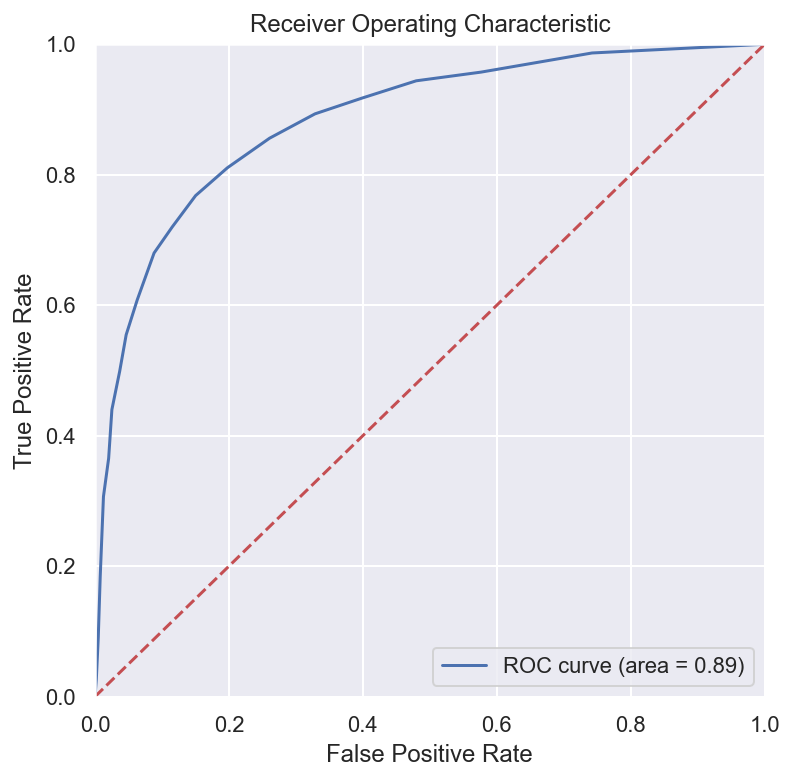


Compare with KNN classification_report (same as default threshold 0.50)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1032
           1       0.74      0.68      0.71       375

    accuracy                           0.85      1407
   macro avg       0.81      0.80      0.80      1407
weighted avg       0.85      0.85      0.85      1407



In [63]:

########### Hyper parameter tuning  ##########

print('\n"""""" KNN """""" (quite slow)')
print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
k_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
    k_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
optimal_k = k_scores.index(max(k_scores))+1   # index 0 is for k=1
print('optimal value of K =', optimal_k)

time1 = time.time()
knn = KNeighborsClassifier(n_neighbors = optimal_k)
model_report('KNN', knn)

print('\nCompare with KNN classification_report (same as default threshold 0.50)')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

model_list.append('KNN')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

In [78]:
# Optimal threshold 0.264
# Precision: 0.5104,   Recall: 0.8205,   F1 Score: 0.6293
# KNN confusion matrix: 
#  [[710 307]
#  [ 70 320]]
# KNN Log-loss: 0.6104
# KNN roc_auc_score: 0.7172
# KNN AUC: 0.8309


"""""" DecisionTreeClassifier """"""

Search for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data
0.6372, 0.6980, 0.6812, 0.6850, 0.6722, 0.6625, 0.6573, 0.6556, 0.6452, optimal F1 score = 0.6980
optimal max_depth = 3

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.4209,  0.100->0.5090,  0.200->0.6829,  0.300->0.7122,  0.400->0.7122,  0.500->0.7122,  0.600->0.6477,  0.700->0.4837,  0.800->0.4837,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.200->0.6829,  0.210->0.7122,  0.220->0.7122,  0.230->0.7122,  0.240->0.7122,  0.250->0.7122,  0.260->0.7122,  0.270->0.7122,  0.280->0.7122,  0.290->0.7122,  0.300->0.7122,  0.310->0.7122,  0.320->0.7122,  0.330->0.7122,  0.340->0.7122,  0.350->0.7122,  0.360->0.7122,  0.370->0.7122,  0.380->0.7122,  0.390->0.7122,  0.400->0.7122,  
Looping decimal place 3
0.200->0.6829,  0.201->0.6829,  0.202->0.6829,  0.203->0.6

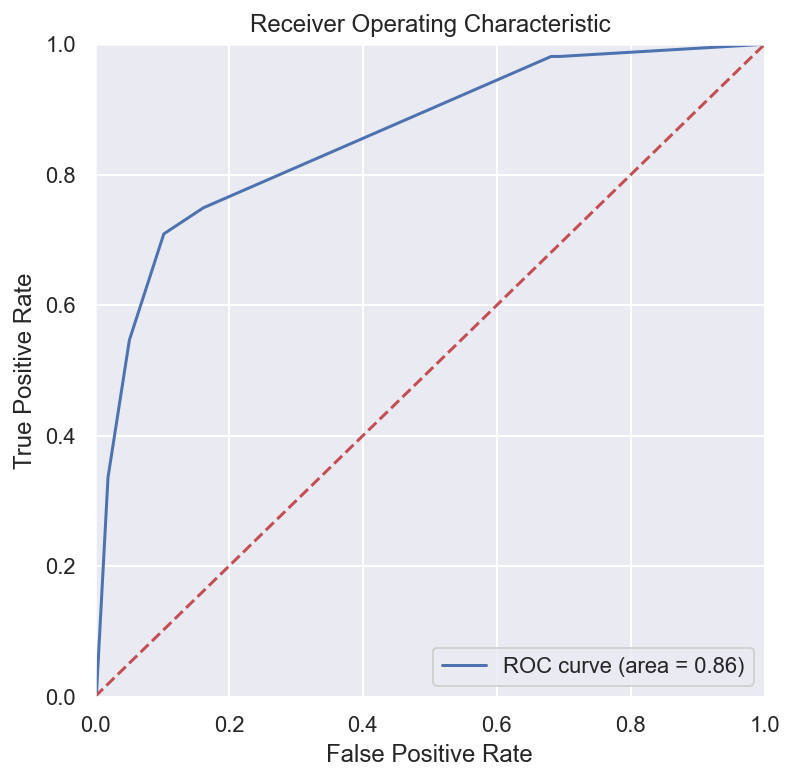

In [65]:
print('\n"""""" DecisionTreeClassifier """"""')

print('\nSearch for optimal max_depth in DecisionTree, vary 2 to 10, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
d_scores = []
for d in range(2, 11):
    decisiontree = DecisionTreeClassifier(max_depth=d)
    cvs = cross_val_score(decisiontree, X_train, y_train, cv=kf, scoring='f1').mean()
    d_scores.append(cvs)
    print('{:.4f}'.format(cvs), end=", ")
print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
optimal_d = d_scores.index(max(d_scores))+2   # index 0 is for d=2
print('optimal max_depth =', optimal_d)

time1 = time.time()
decisiontree = DecisionTreeClassifier(max_depth=optimal_d)
model_report('DecisionTreeClassifier', decisiontree)

model_list.append('DecisionTreeClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

In [80]:
# Optimal threshold 0.2866
# Precision: 0.5687,   Recall: 0.6154,   F1 Score: 0.5911
# DecisionTreeClassifier confusion matrix: 
#  [[835 182]
#  [150 240]]


"""""" RandomForestClassifier """""" (quite slow)

Search for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data
100->0.6784, 150->0.6734, 200->0.6756, 250->0.6780, 300->0.6765, 350->0.6839, 400->0.6773, 450->0.6784, 500->0.6780, optimal F1 score = 0.6839
optimal n_estimators = 350

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.4430,  0.100->0.5905,  0.200->0.6797,  0.300->0.7032,  0.400->0.7048,  0.500->0.6881,  0.600->0.6520,  0.700->0.5674,  0.800->0.4576,  0.900->0.2603,  1.000->0.0262,  
Looping decimal place 2
0.300->0.7032,  0.310->0.7066,  0.320->0.7105,  0.330->0.7125,  0.340->0.7114,  0.350->0.7118,  0.360->0.7139,  0.370->0.7077,  0.380->0.7063,  0.390->0.7050,  0.400->0.7048,  0.410->0.6999,  0.420->0.6985,  0.430->0.6953,  0.440->0.6955,  0.450->0.6958,  0.460->0.6970,  0.470->0.6953,  0.480->0.6936,  0.490->0.6899,  0.500->0.6891,  
Looping decim

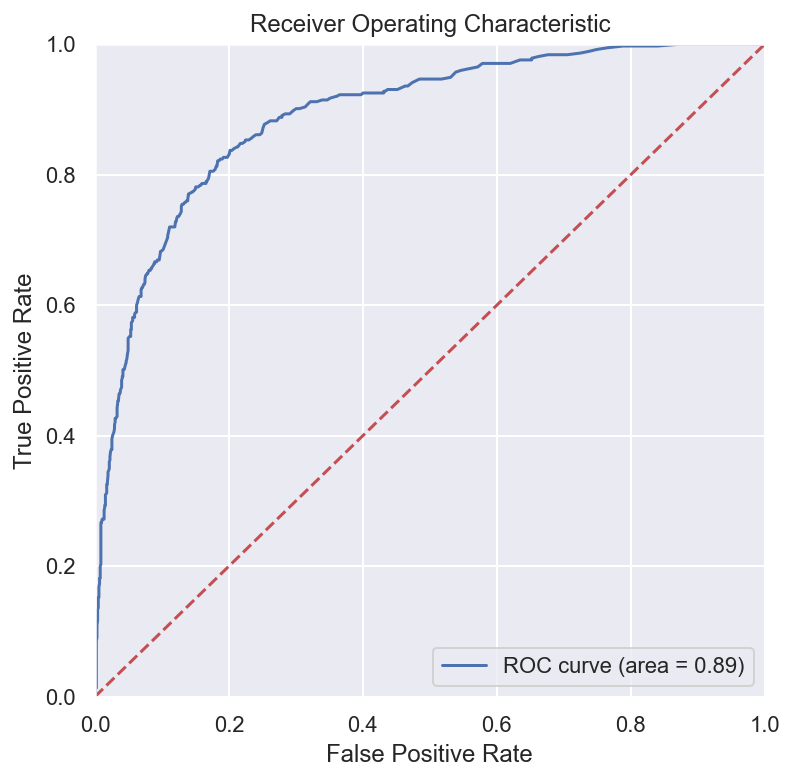

In [66]:
print('\n"""""" RandomForestClassifier """""" (quite slow)')

print('\nSearch for optimal n_estimators in RandomForest, vary 100 to 500, using KFold(5) Cross Validation on train data')
kf = KFold(n_splits=5, random_state=21, shuffle=True)  #produce the k folds
score_list = []
n_list = []
for n in [100, 150, 200, 250, 300, 350, 400, 450, 500]:
    randomforest = RandomForestClassifier(n_estimators=n)
    cvs = (cross_val_score(randomforest, X_train, y_train, cv=kf, scoring='f1')).mean()
    score_list.append(cvs)
    n_list.append(n)
    print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
print('optimal F1 score = {:.4f}'.format(max(score_list)))
optimal_n = int(n_list[score_list.index(max(score_list))])
print('optimal n_estimators = {:.0f}'.format(optimal_n))

time1 = time.time()
randomforest = RandomForestClassifier(n_estimators=optimal_n)
model_report('RandomForestClassifier', randomforest)

model_list.append('RandomForestClassifier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

In [82]:
# Optimal threshold 0.340
# Precision: 0.5830,   Recall: 0.7026,   F1 Score: 0.6372
# RandomForestClassifier confusion matrix: 
#  [[821 196]
#  [116 274]]
# RandomForestClassifier Log-loss: 0.4724
# RandomForestClassifier roc_auc_score: 0.6946
# RandomForestClassifier AUC: 0.8272


"""""" LinearSVC """"""
LinearSVC accuracy score is
Training: 85.00%
Test set: 85.50%
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1032
           1       0.77      0.65      0.70       375

    accuracy                           0.86      1407
   macro avg       0.83      0.79      0.80      1407
weighted avg       0.85      0.86      0.85      1407

LinearSVC confusion matrix: 
 [[960  72]
 [132 243]]
LinearSVC Log-loss: 5.0078
LinearSVC roc_auc_score: 0.7891
LinearSVC AUC: 0.7891


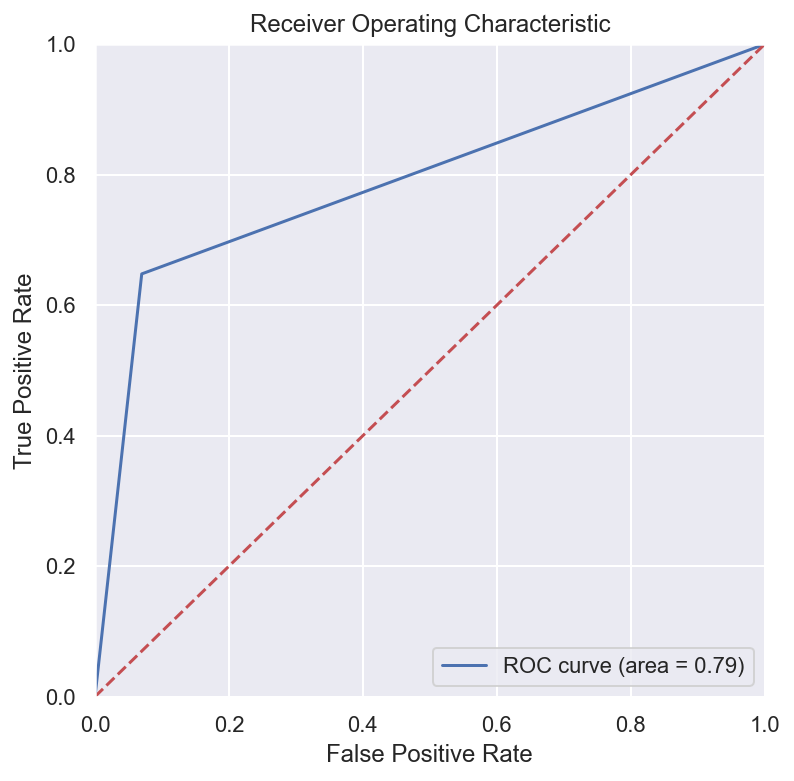

In [67]:
print('\n"""""" LinearSVC """"""')
time1 = time.time()
linearsvc = LinearSVC()
# model_report('LinearSVC', linearsvc)   # model has no attribute 'predict_proba'
linearsvc.fit(X_train, y_train)
print('LinearSVC accuracy score is')
print('Training: {:.2f}%'.format(100*linearsvc.score(X_train, y_train)))  # score uses accuracy
print('Test set: {:.2f}%'.format(100*linearsvc.score(X_test, y_test)))   # should use cross validation

y_pred = linearsvc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))

model_f1 = f1_score(y_test, y_pred)

model_ll = log_loss(y_test, y_pred)
print('LinearSVC Log-loss: {:.4f}'.format(model_ll))
model_roc_auc = roc_auc_score(y_test, y_pred)
print('LinearSVC roc_auc_score: {:.4f}'.format(model_roc_auc)) 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
model_auc = auc(fpr, tpr)
print('LinearSVC AUC: {:.4f}'.format(model_auc))

# plot the ROC curve
plt.figure(figsize = [6,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('roc_auc_score')
plt.show()

model_list.append('LinearSVC')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)
time_list.append(time.time() - time1)

In [84]:
# LinearSVC confusion matrix: 
#  [[933  84]
#  [201 189]]
# LinearSVC Log-loss: 6.9962
# LinearSVC roc_auc_score: 0.7010
# LinearSVC AUC: 0.7010

In [85]:
#print('\n"""""" SVC """""" (extremely slow)')
#time1 = time.time()
#svc = SVC(gamma='scale', probability=True)
#model_report('SVC', svc)

#model_list.append('SVC')
#f1_list.append(model_f1)
#auc_list.append(model_auc)
#ll_list.append(model_ll)
#roc_auc_list.append(model_roc_auc)
# time_list.append(time.time() - time1)   # use this line for actual time spent, or
#time_list.append(0)                       # use this line to be able to see time spent for other models

In [86]:
# Optimal threshold 0.184
# Precision: 0.5884,   Recall: 0.7256,   F1 Score: 0.6498
# SVC confusion matrix: 
#  [[819 198]
#  [107 283]]
# SVC Log-loss: 0.4682
# SVC roc_auc_score: 0.6921
# SVC AUC: 0.7970

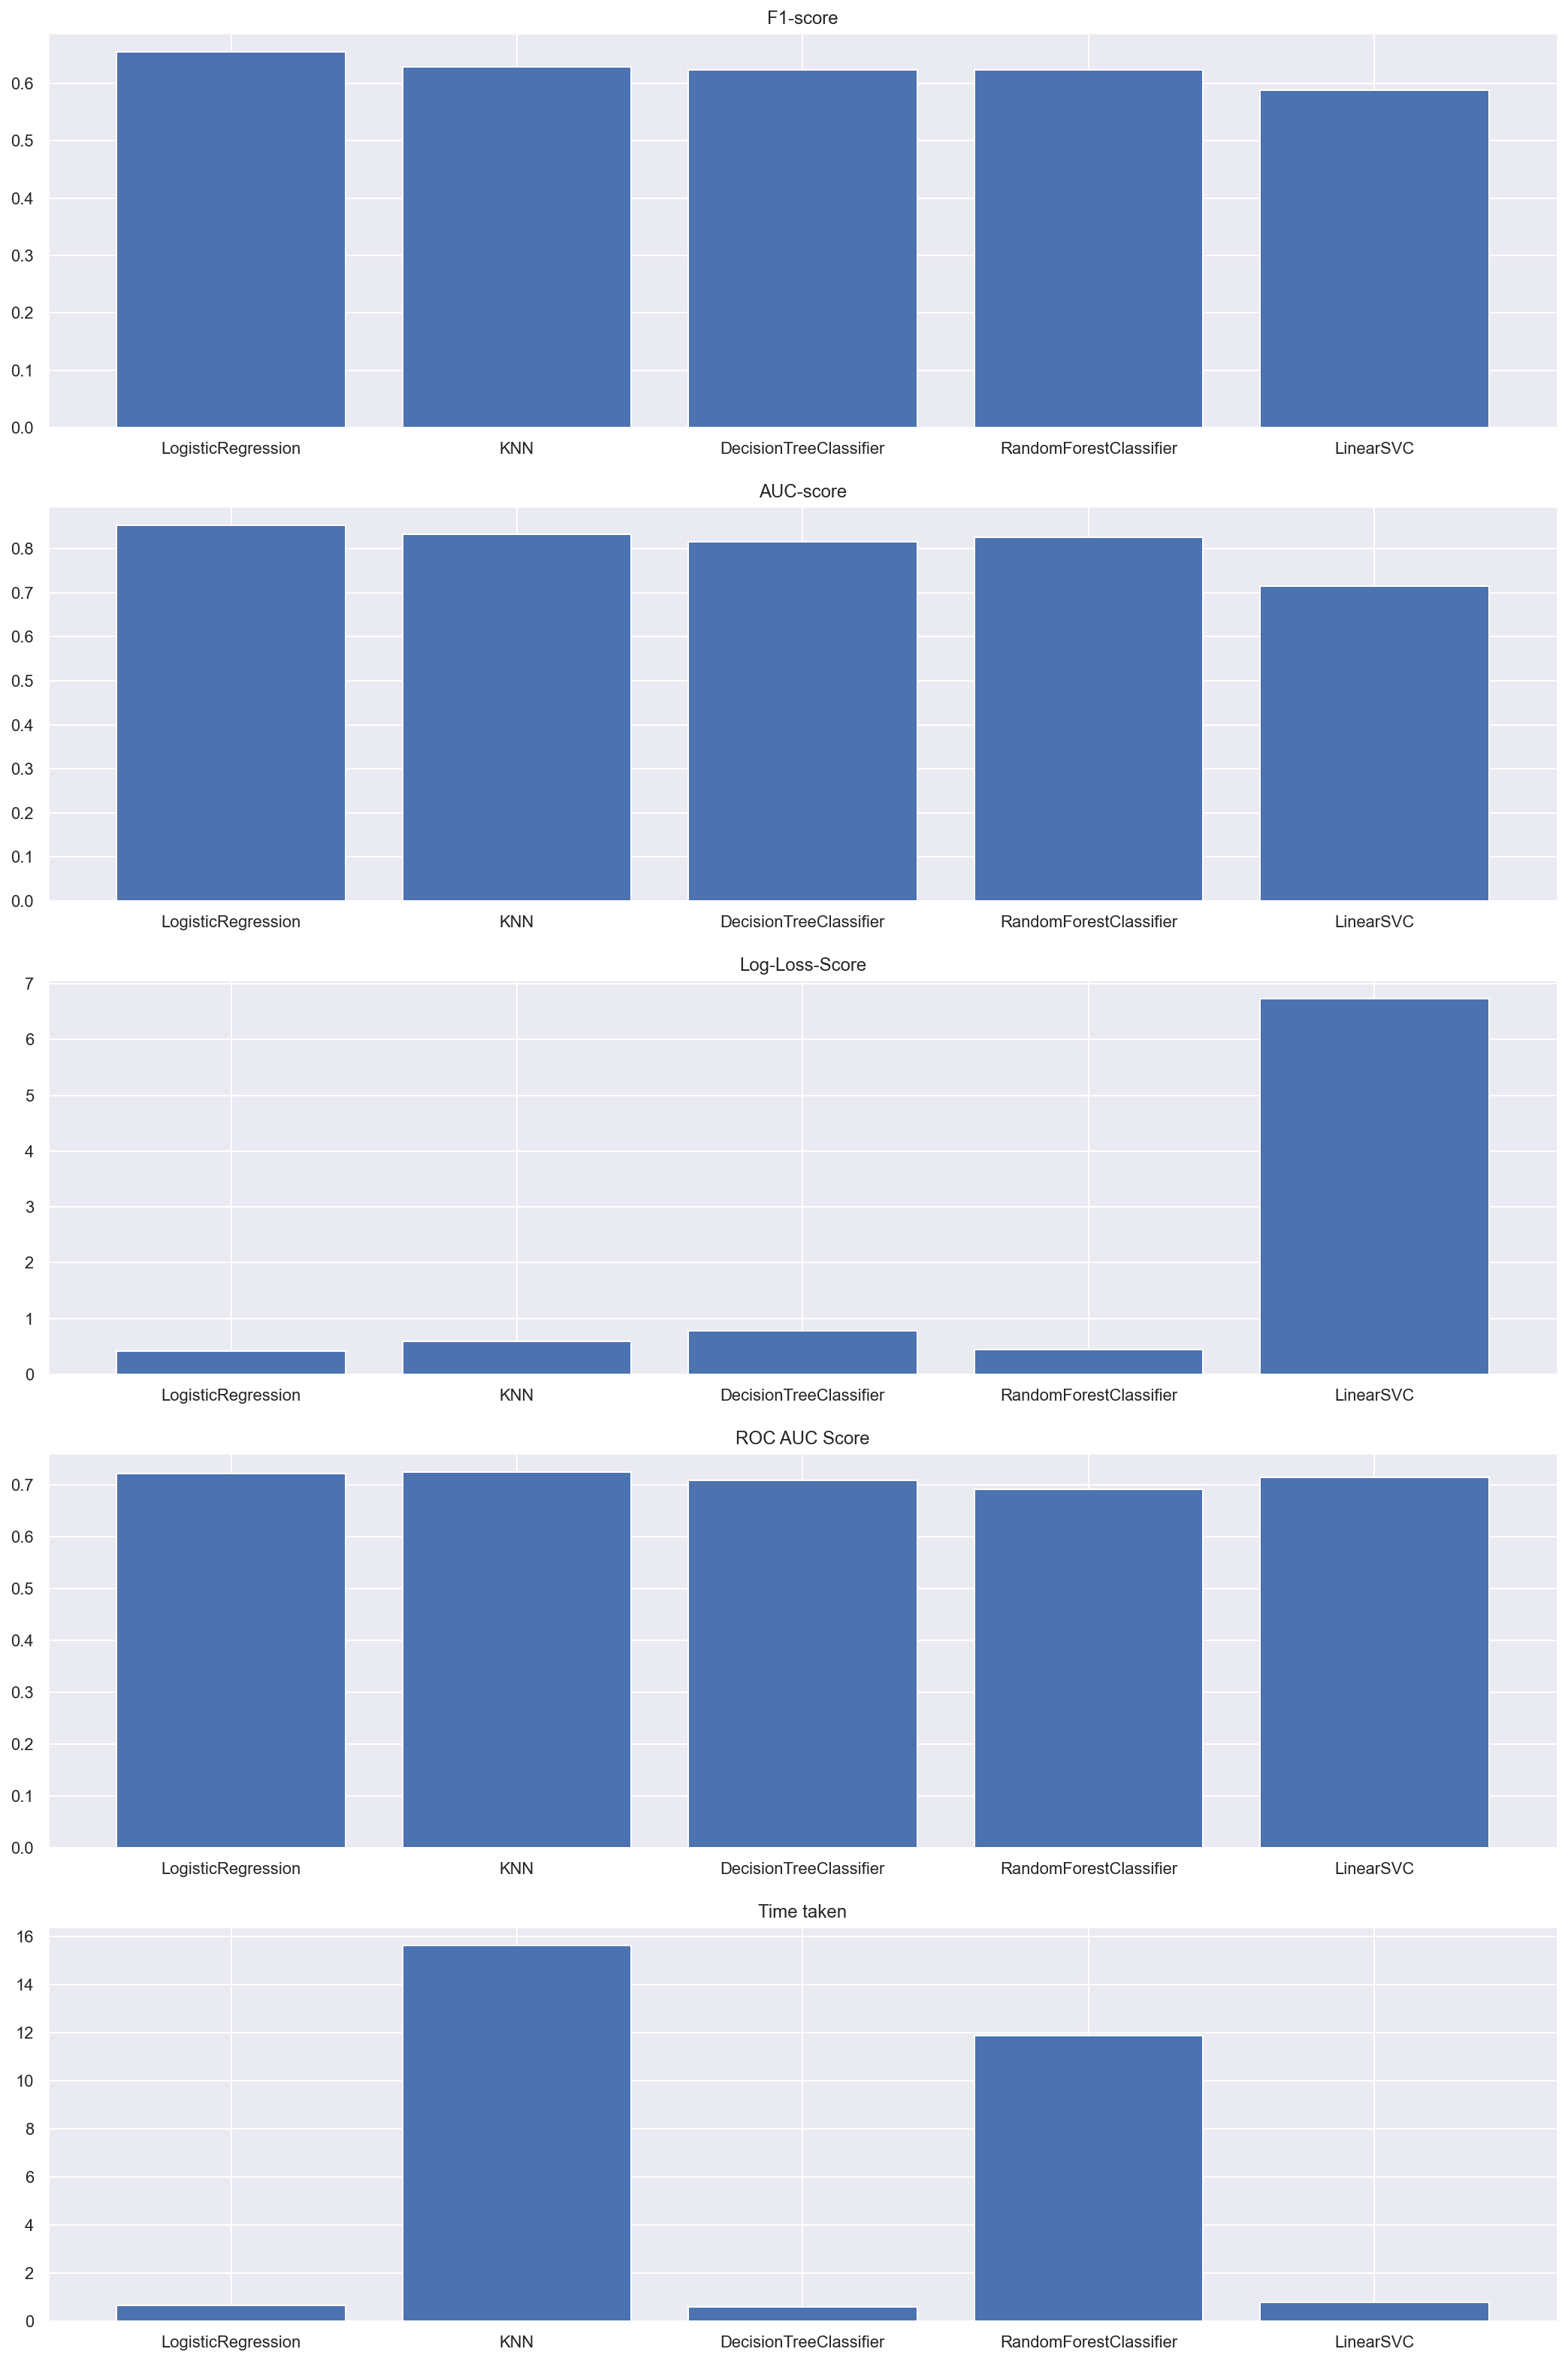

In [87]:
## plot the classification report scores
fig, ax = plt.subplots(5, 1, figsize=(18, 28))
# fig.set_figwidth(10)
# fig.set_figheight(6)
# fig.suptitle('Main Title',fontsize = 16)
ax[0].bar(model_list, f1_list)
ax[0].set_title('F1-score')
ax[1].bar(model_list, auc_list)
ax[1].set_title('AUC-score')
ax[2].bar(model_list, ll_list)
ax[2].set_title('Log-Loss-Score')
ax[3].bar(model_list, roc_auc_list)
ax[3].set_title('ROC AUC Score')
ax[4].bar(model_list, time_list)
ax[4].set_title('Time taken')
# Fine-tune figure: make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

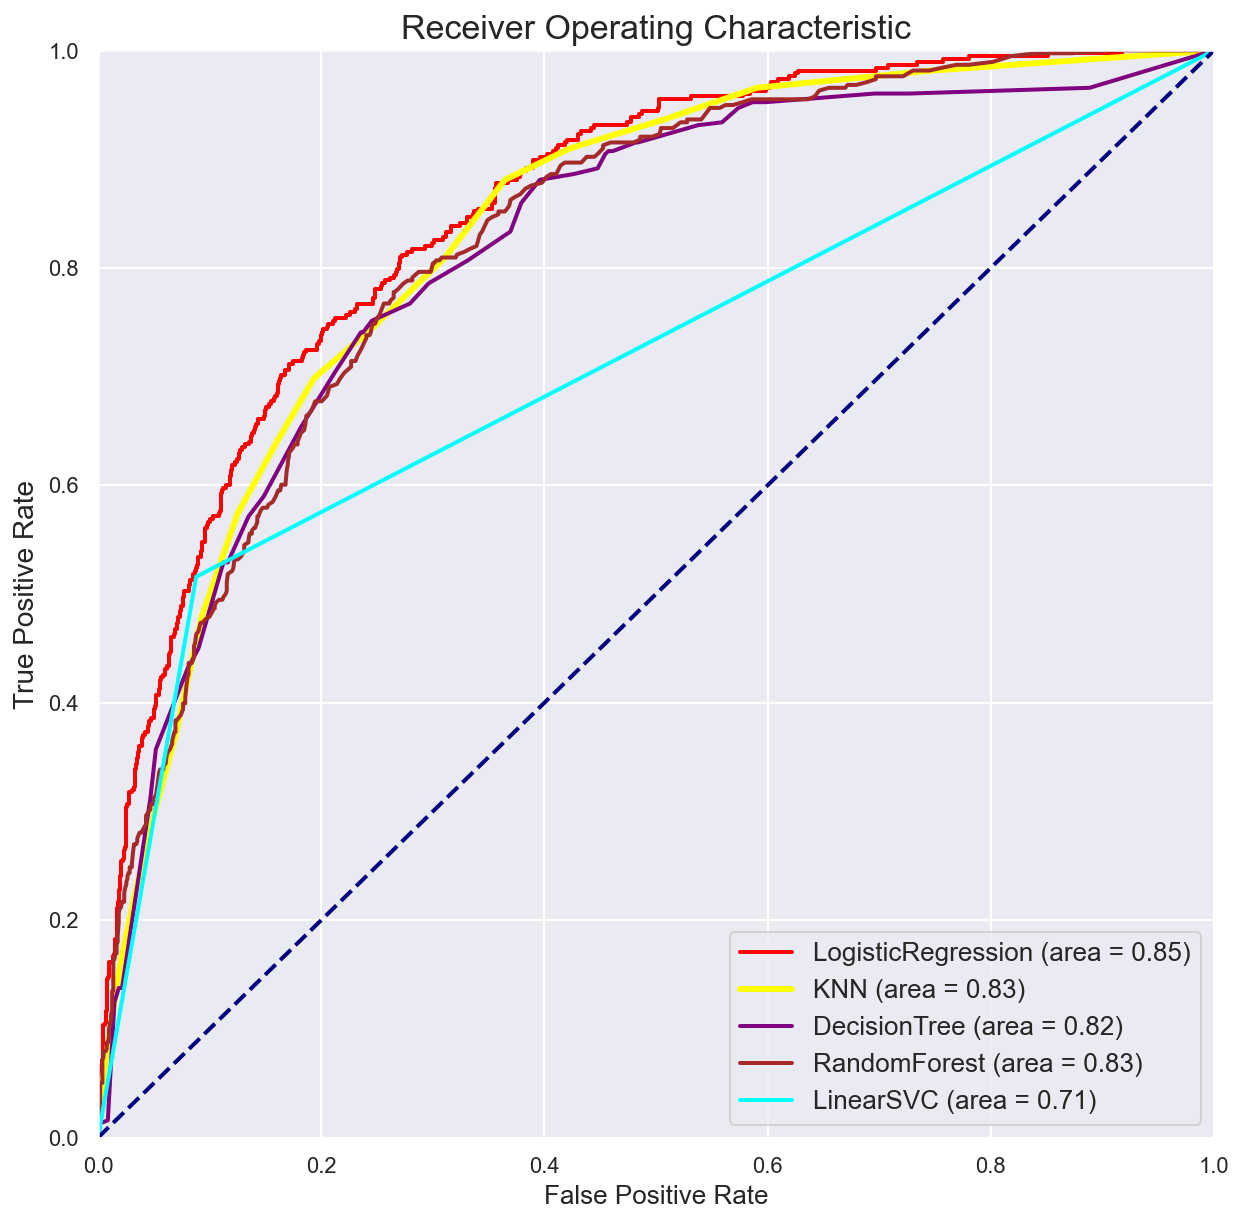

In [88]:
# plot the ROC curves
plt.figure(figsize=(10,10))

#y_pred = gnb.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#plt.plot(fpr, tpr, color='blue',
 #       lw=3, label='GaussianNB (area = %0.2f)' % auc_list[0])

#y_pred = bnb.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#plt.plot(fpr, tpr, color='green',
 #       lw=3, label='BernoulliNB (area = %0.2f)' % auc_list[1])

y_pred = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red',
        lw=2, label='LogisticRegression (area = %0.2f)' % auc_list[0])

y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='yellow',
        lw=3, label='KNN (area = %0.2f)' % auc_list[1])

y_pred = decisiontree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='purple',
        lw=2, label='DecisionTree (area = %0.2f)' % auc_list[2])

y_pred = randomforest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='brown',
        lw=2, label='RandomForest (area = %0.2f)' % auc_list[3])

y_pred = linearsvc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='cyan',
        lw=2, label='LinearSVC (area = %0.2f)' % auc_list[4])

#y_pred = svc.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#plt.plot(fpr, tpr, color='magenta',
 #       lw=2, label='SVC (area = %0.2f)' % auc_list[5])

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

In [89]:
# see how logistic regression confusion matrix varies with threshold
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_pred = (logit.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no churn', 'churn'],
           yticklabels=['no churn', 'churn'])
    plt.xlabel('prediction')
    plt.ylabel('actual')
# Let's see how our confusion matrix changes with changes to the cutoff! 
from ipywidgets import interactive, FloatSlider
logit = LogisticRegression(C = optimal_c)
logit.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(logit, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [61]:
# compare above Confusion Matrix with the Optimal threshold 0.318
# Precision: 0.5812,   Recall: 0.7615,   F1 Score: 0.6593
# LogisticRegression confusion matrix: 
#  [[803 214]
#  [ 93 297]]

In [90]:
import pickle
# Lets dump our Adaboost model
pickle.dump(logit, open('log_model.pkl','wb'))

# CONCLUSION
These are some of the quick insights from this exercise:

Electronic check medium are the highest churners
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
No Online security, No Tech Support category are high churners
Non senior Citizens are high churners